# Report 01 Table 1. See Table 2 Below

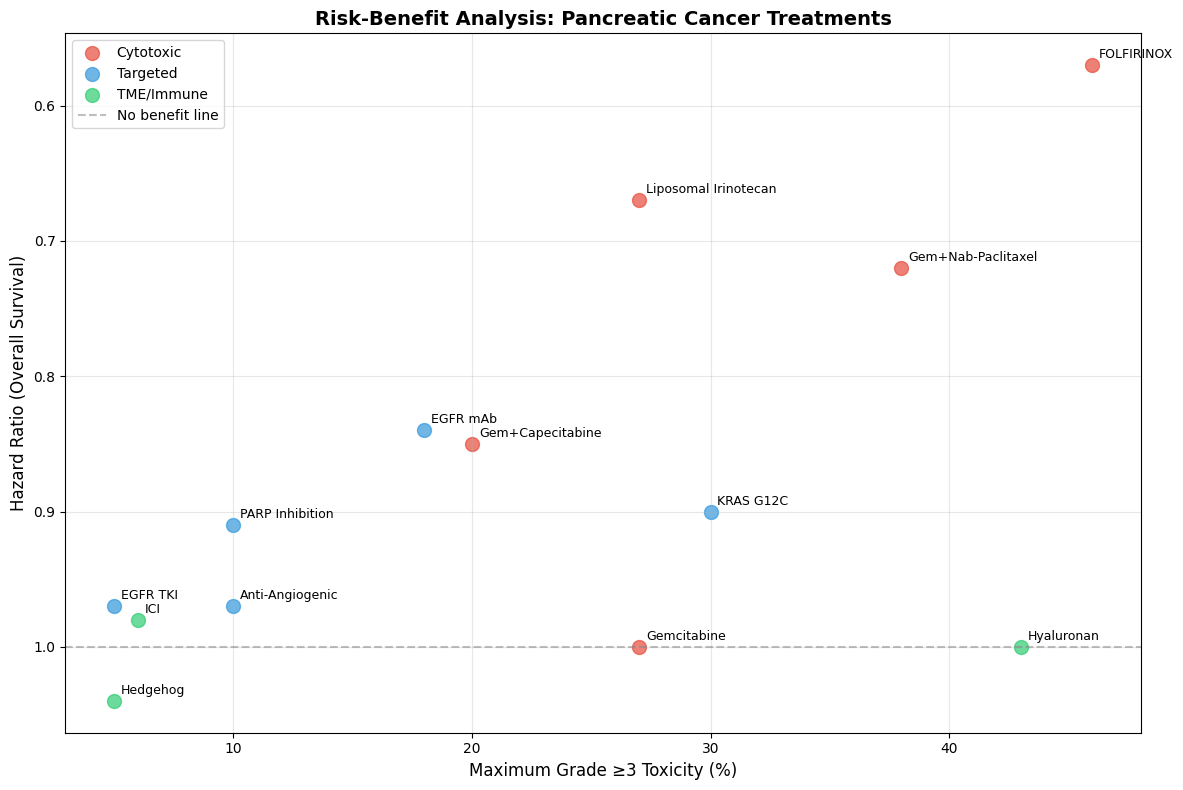

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data extraction from the table
data = {
    'Treatment': ['Gemcitabine', 'FOLFIRINOX', 'Gem+Nab-Paclitaxel', 'Gem+Capecitabine',
                  'Liposomal Irinotecan', 'EGFR TKI', 'PARP Inhibition', 'EGFR mAb',
                  'Anti-Angiogenic', 'KRAS G12C', 'Hedgehog', 'Hyaluronan', 'ICI'],
    'HR_OS': [1.0, 0.57, 0.72, 0.85, 0.67, 0.97, 0.91, 0.84, 0.97, 0.90, 1.04, 1.00, 0.98],
    'Max_Toxicity': [27, 46, 38, 20, 27, 5, 10, 18, 10, 30, 5, 43, 6],
    'Category': ['Cytotoxic', 'Cytotoxic', 'Cytotoxic', 'Cytotoxic', 'Cytotoxic',
                 'Targeted', 'Targeted', 'Targeted', 'Targeted', 'Targeted',
                 'TME/Immune', 'TME/Immune', 'TME/Immune']
}

df = pd.DataFrame(data)

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

colors = {'Cytotoxic': '#e74c3c', 'Targeted': '#3498db', 'TME/Immune': '#2ecc71'}
for category in df['Category'].unique():
    subset = df[df['Category'] == category]
    ax.scatter(subset['Max_Toxicity'], subset['HR_OS'],
              c=colors[category], label=category, s=100, alpha=0.7)

# Add treatment labels
for i, txt in enumerate(df['Treatment']):
    ax.annotate(txt, (df['Max_Toxicity'][i], df['HR_OS'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Formatting
ax.set_xlabel('Maximum Grade ≥3 Toxicity (%)', fontsize=12)
ax.set_ylabel('Hazard Ratio (Overall Survival)', fontsize=12)
ax.set_title('Risk-Benefit Analysis: Pancreatic Cancer Treatments', fontsize=14, fontweight='bold')
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='No benefit line')
ax.legend()
ax.grid(True, alpha=0.3)

# Invert y-axis so better efficacy (lower HR) is higher
ax.invert_yaxis()

plt.tight_layout()
plt.show()

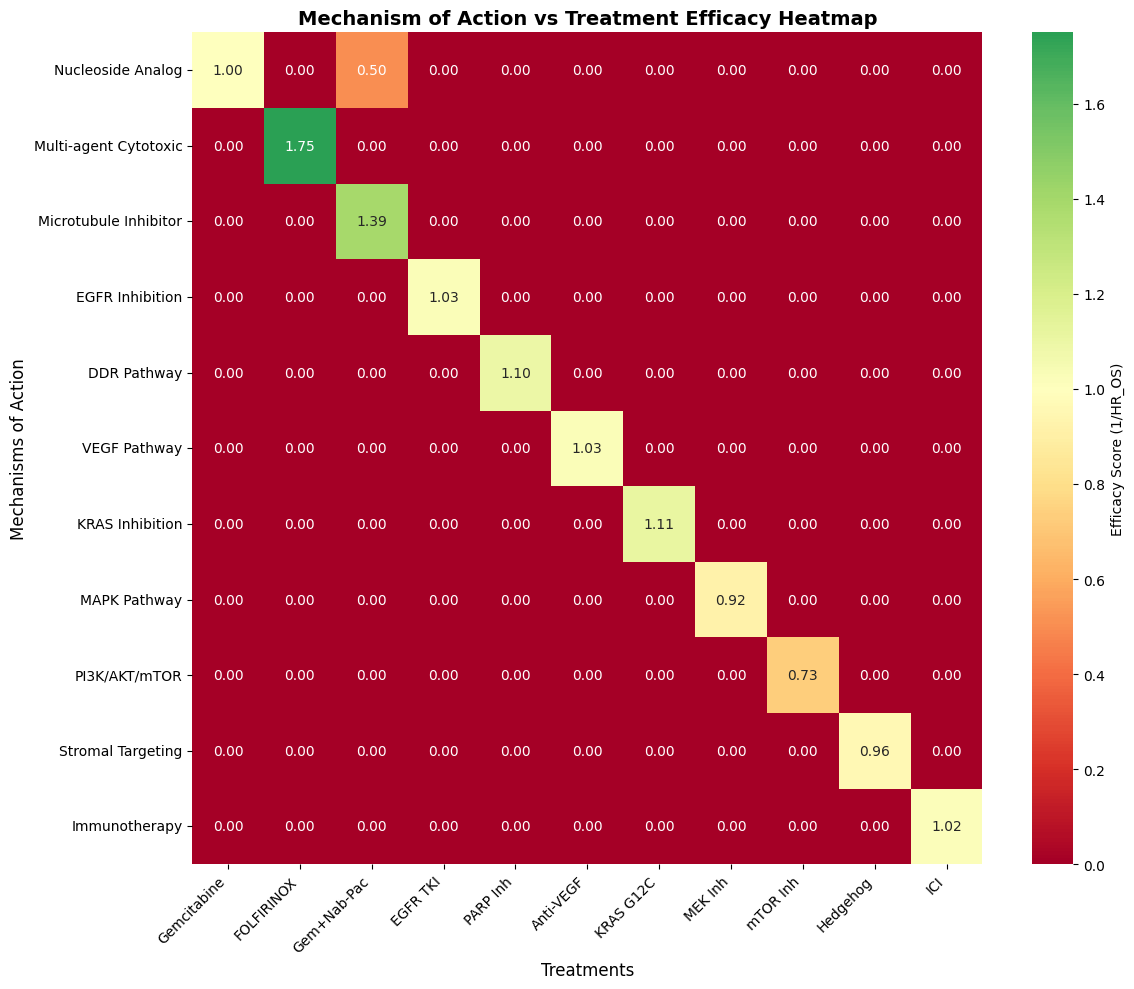

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create mechanism-efficacy matrix
mechanisms = ['Nucleoside Analog', 'Multi-agent Cytotoxic', 'Microtubule Inhibitor',
              'EGFR Inhibition', 'DDR Pathway', 'VEGF Pathway', 'KRAS Inhibition',
              'MAPK Pathway', 'PI3K/AKT/mTOR', 'Stromal Targeting', 'Immunotherapy']

treatments = ['Gemcitabine', 'FOLFIRINOX', 'Gem+Nab-Pac', 'EGFR TKI', 'PARP Inh',
              'Anti-VEGF', 'KRAS G12C', 'MEK Inh', 'mTOR Inh', 'Hedgehog', 'ICI']

# Efficacy matrix (1/HR_OS for better visualization - higher is better)
efficacy_matrix = np.array([
    [1.0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],  # Nucleoside Analog
    [0, 1.75, 0, 0, 0, 0, 0, 0, 0, 0, 0],   # Multi-agent Cytotoxic
    [0, 0, 1.39, 0, 0, 0, 0, 0, 0, 0, 0],   # Microtubule Inhibitor
    [0, 0, 0, 1.03, 0, 0, 0, 0, 0, 0, 0],   # EGFR Inhibition
    [0, 0, 0, 0, 1.10, 0, 0, 0, 0, 0, 0],   # DDR Pathway
    [0, 0, 0, 0, 0, 1.03, 0, 0, 0, 0, 0],   # VEGF Pathway
    [0, 0, 0, 0, 0, 0, 1.11, 0, 0, 0, 0],   # KRAS Inhibition
    [0, 0, 0, 0, 0, 0, 0, 0.92, 0, 0, 0],   # MAPK Pathway
    [0, 0, 0, 0, 0, 0, 0, 0, 0.73, 0, 0],   # PI3K/AKT/mTOR
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.96, 0],   # Stromal Targeting
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.02]    # Immunotherapy
])

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(efficacy_matrix,
            xticklabels=treatments,
            yticklabels=mechanisms,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            center=1.0,
            cbar_kws={'label': 'Efficacy Score (1/HR_OS)'})

plt.title('Mechanism of Action vs Treatment Efficacy Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Treatments', fontsize=12)
plt.ylabel('Mechanisms of Action', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

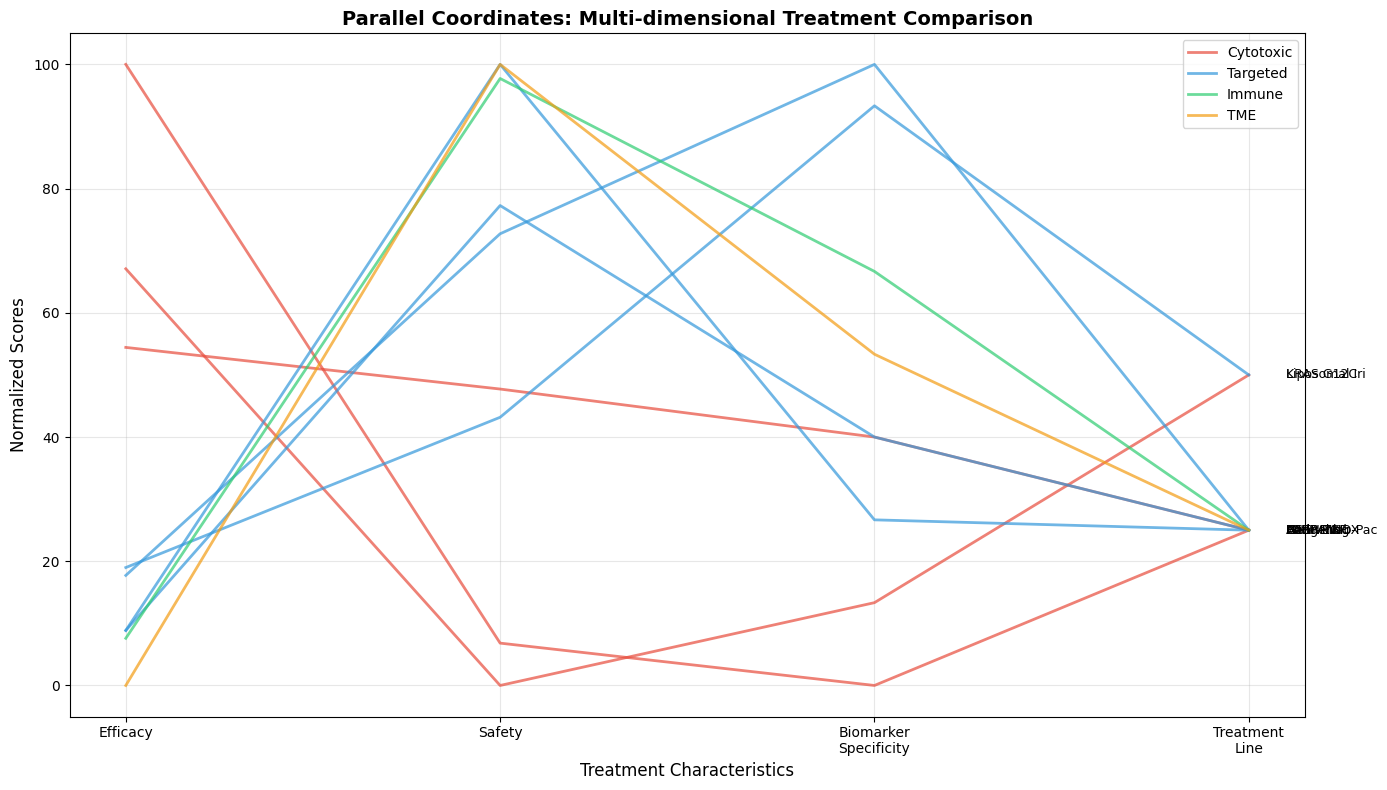

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np

# Comprehensive treatment data
data = {
    'Treatment': ['FOLFIRINOX', 'Gem+Nab-Pac', 'Liposomal Iri', 'PARP Inh', 'KRAS G12C',
                  'ICI', 'EGFR TKI', 'Anti-VEGF', 'Hedgehog'],
    'Efficacy_Score': [1.75, 1.39, 1.49, 1.10, 1.11, 1.02, 1.03, 1.03, 0.96],  # 1/HR_OS
    'Safety_Score': [54, 72, 51, 83, 70, 94, 95, 85, 95],  # 100 - max toxicity%
    'Biomarker_Spec': [20, 50, 30, 95, 90, 70, 40, 50, 60],  # Biomarker specificity
    'Line_Therapy': [1, 1, 2, 1, 2, 1, 1, 1, 1],  # Treatment line
    'Category': ['Cytotoxic', 'Cytotoxic', 'Cytotoxic', 'Targeted', 'Targeted',
                 'Immune', 'Targeted', 'Targeted', 'TME']
}

df = pd.DataFrame(data)

# Normalize data for better visualization
df_norm = df.copy()
for col in ['Efficacy_Score', 'Safety_Score', 'Biomarker_Spec']:
    df_norm[col] = (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min()) * 100

# Create parallel coordinates plot
plt.figure(figsize=(14, 8))

# Define colors for categories
color_map = {'Cytotoxic': '#e74c3c', 'Targeted': '#3498db', 'Immune': '#2ecc71', 'TME': '#f39c12'}

for category in df_norm['Category'].unique():
    subset = df_norm[df_norm['Category'] == category]
    for i, row in subset.iterrows():
        plt.plot(['Efficacy', 'Safety', 'Biomarker\nSpecificity', 'Treatment\nLine'],
                [row['Efficacy_Score'], row['Safety_Score'], row['Biomarker_Spec'], row['Line_Therapy']*25],
                color=color_map[category], alpha=0.7, linewidth=2, label=category if i == subset.index[0] else "")

# Add treatment labels
for i, row in df_norm.iterrows():
    plt.text(3.1, row['Line_Therapy']*25, row['Treatment'],
             verticalalignment='center', fontsize=9)

plt.xlabel('Treatment Characteristics', fontsize=12)
plt.ylabel('Normalized Scores', fontsize=12)
plt.title('Parallel Coordinates: Multi-dimensional Treatment Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

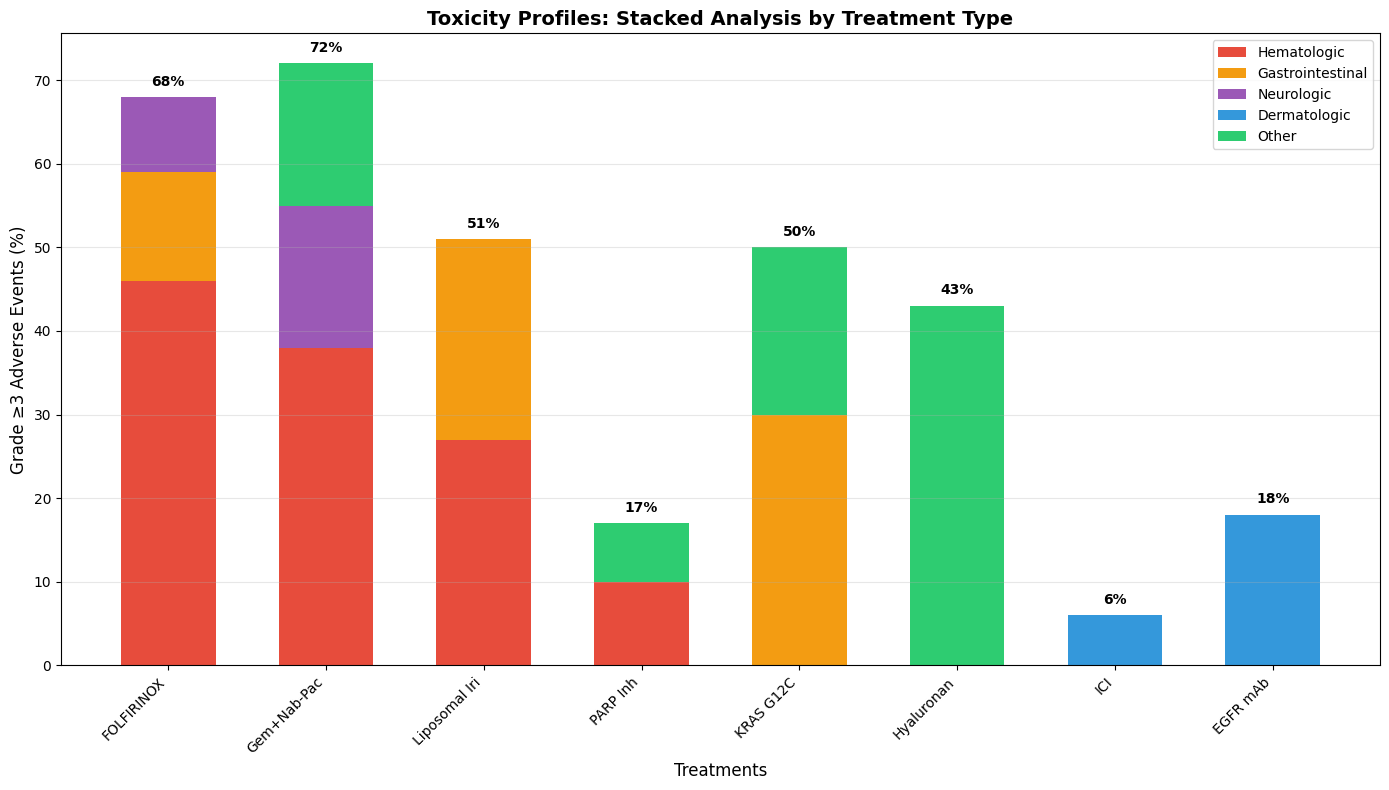

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Toxicity data for major treatments
treatments = ['FOLFIRINOX', 'Gem+Nab-Pac', 'Liposomal Iri', 'PARP Inh', 'KRAS G12C',
              'Hyaluronan', 'ICI', 'EGFR mAb']

# Toxicity categories (Grade ≥3 %)
hematologic = [46, 38, 27, 10, 0, 0, 0, 0]  # Neutropenia/Anemia
gastrointestinal = [13, 0, 24, 0, 30, 0, 0, 0]  # Diarrhea/Vomiting
neurologic = [9, 17, 0, 0, 0, 0, 0, 0]  # Neuropathy
dermatologic = [0, 0, 0, 0, 0, 0, 6, 18]  # Rash
other = [0, 17, 0, 7, 20, 43, 0, 0]  # Fatigue/Other

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Width of bars
bar_width = 0.6
indices = np.arange(len(treatments))

# Create stacked bars
p1 = ax.bar(indices, hematologic, bar_width, label='Hematologic', color='#e74c3c')
p2 = ax.bar(indices, gastrointestinal, bar_width, bottom=hematologic, label='Gastrointestinal', color='#f39c12')
p3 = ax.bar(indices, neurologic, bar_width, bottom=np.array(hematologic) + np.array(gastrointestinal),
            label='Neurologic', color='#9b59b6')
p4 = ax.bar(indices, dermatologic, bar_width,
            bottom=np.array(hematologic) + np.array(gastrointestinal) + np.array(neurologic),
            label='Dermatologic', color='#3498db')
p5 = ax.bar(indices, other, bar_width,
            bottom=np.array(hematologic) + np.array(gastrointestinal) + np.array(neurologic) + np.array(dermatologic),
            label='Other', color='#2ecc71')

# Formatting
ax.set_xlabel('Treatments', fontsize=12)
ax.set_ylabel('Grade ≥3 Adverse Events (%)', fontsize=12)
ax.set_title('Toxicity Profiles: Stacked Analysis by Treatment Type', fontsize=14, fontweight='bold')
ax.set_xticks(indices)
ax.set_xticklabels(treatments, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add total toxicity labels on top of bars
totals = np.array(hematologic) + np.array(gastrointestinal) + np.array(neurologic) + np.array(dermatologic) + np.array(other)
for i, total in enumerate(totals):
    if total > 0:
        ax.text(i, total + 1, f'{total}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

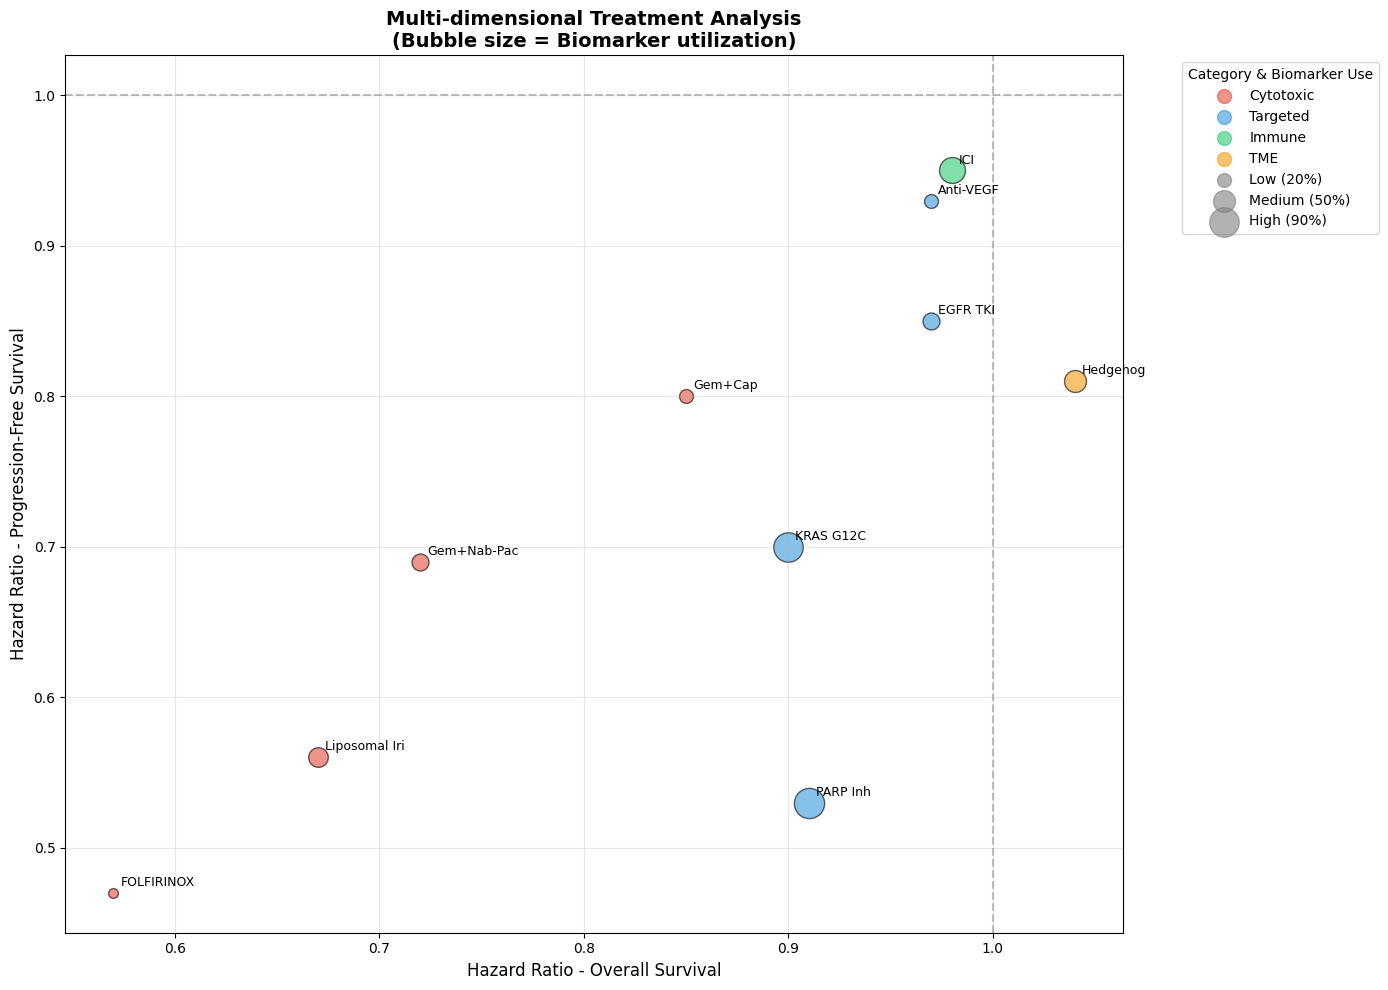

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Multi-dimensional treatment data
data = {
    'Treatment': ['FOLFIRINOX', 'Gem+Nab-Pac', 'Gem+Cap', 'Liposomal Iri', 'PARP Inh',
                  'KRAS G12C', 'ICI', 'EGFR TKI', 'Anti-VEGF', 'Hedgehog'],
    'HR_OS': [0.57, 0.72, 0.85, 0.67, 0.91, 0.90, 0.98, 0.97, 0.97, 1.04],
    'HR_PFS': [0.47, 0.69, 0.80, 0.56, 0.53, 0.70, 0.95, 0.85, 0.93, 0.81],
    'Max_Toxicity': [46, 38, 20, 27, 10, 30, 6, 5, 10, 5],
    'Biomarker_Use': [10, 30, 20, 40, 95, 90, 70, 30, 20, 50],  # % biomarker-driven
    'Category': ['Cytotoxic', 'Cytotoxic', 'Cytotoxic', 'Cytotoxic', 'Targeted',
                 'Targeted', 'Immune', 'Targeted', 'Targeted', 'TME']
}

# Create bubble chart
fig, ax = plt.subplots(figsize=(14, 10))

colors = {'Cytotoxic': '#e74c3c', 'Targeted': '#3498db', 'Immune': '#2ecc71', 'TME': '#f39c12'}

for i, category in enumerate(data['Category']):
    # Bubble size based on biomarker use
    size = data['Biomarker_Use'][i] * 5  # Scale for visibility

    ax.scatter(data['HR_OS'][i], data['HR_PFS'][i],
              s=size, c=colors[category], alpha=0.6,
              edgecolors='black', linewidth=1)

    # Add treatment labels
    ax.annotate(data['Treatment'][i],
                (data['HR_OS'][i], data['HR_PFS'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Reference lines
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)

# Create legend for categories
for category, color in colors.items():
    ax.scatter([], [], c=color, alpha=0.6, s=100, label=category)

# Create legend for bubble sizes
sizes = [20, 50, 90]
size_labels = ['Low (20%)', 'Medium (50%)', 'High (90%)']
for size, label in zip(sizes, size_labels):
    ax.scatter([], [], c='gray', alpha=0.6, s=size*5, label=label)

ax.legend(title='Category & Biomarker Use', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('Hazard Ratio - Overall Survival', fontsize=12)
ax.set_ylabel('Hazard Ratio - Progression-Free Survival', fontsize=12)
ax.set_title('Multi-dimensional Treatment Analysis\n(Bubble size = Biomarker utilization)',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

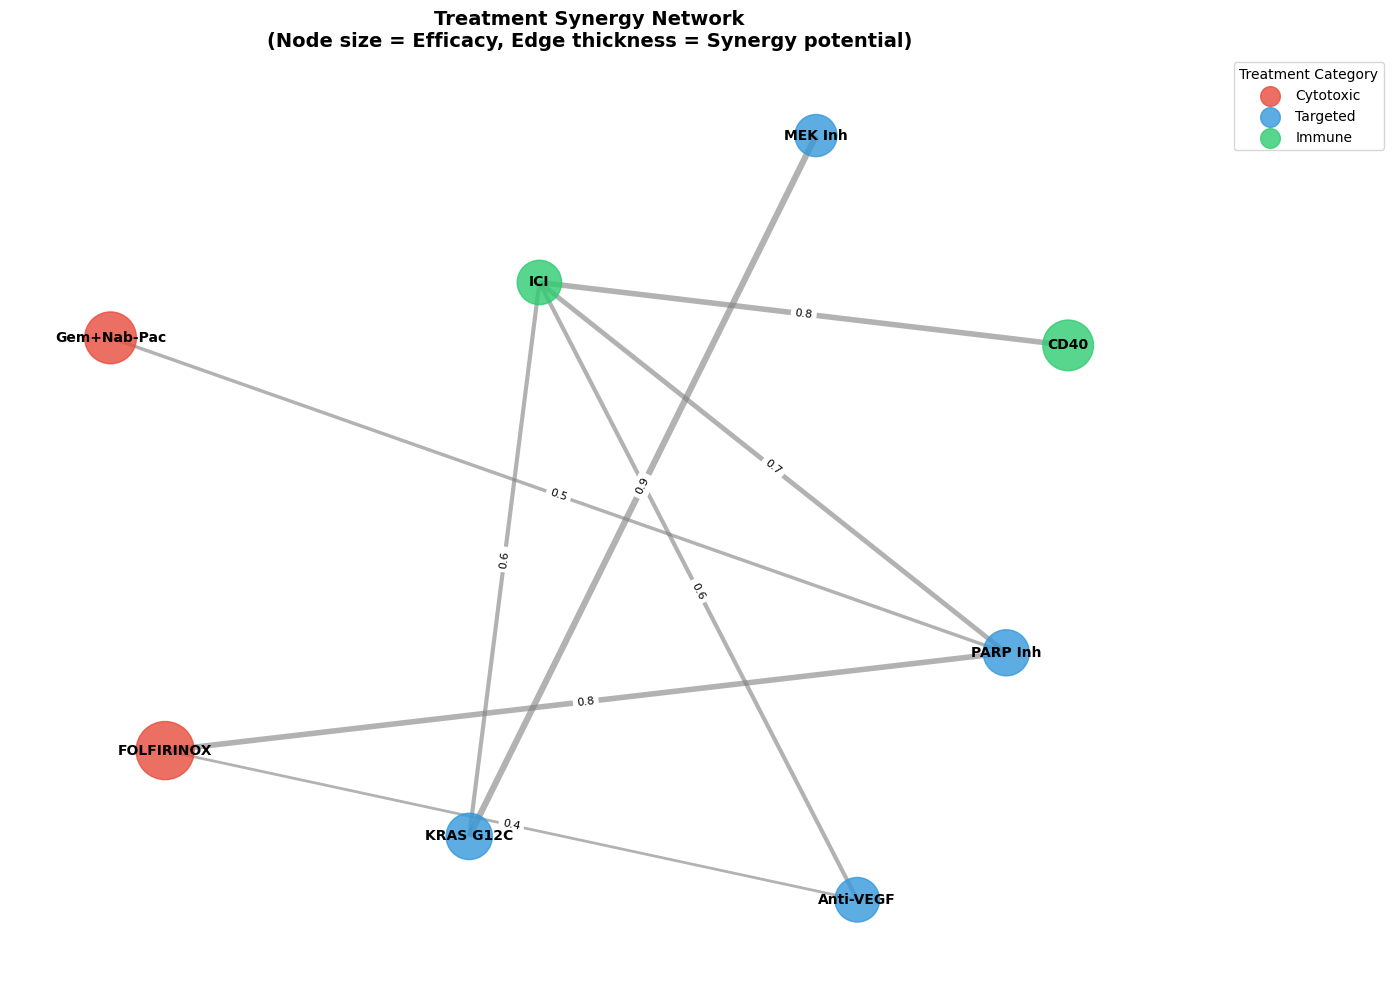

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create network graph
G = nx.Graph()

# Add nodes (treatments)
treatments = {
    'FOLFIRINOX': {'category': 'Cytotoxic', 'efficacy': 1.75},
    'Gem+Nab-Pac': {'category': 'Cytotoxic', 'efficacy': 1.39},
    'PARP Inh': {'category': 'Targeted', 'efficacy': 1.10},
    'KRAS G12C': {'category': 'Targeted', 'efficacy': 1.11},
    'ICI': {'category': 'Immune', 'efficacy': 1.02},
    'CD40': {'category': 'Immune', 'efficacy': 1.33},
    'Anti-VEGF': {'category': 'Targeted', 'efficacy': 1.03},
    'MEK Inh': {'category': 'Targeted', 'efficacy': 0.92}
}

for treatment, attrs in treatments.items():
    G.add_node(treatment, **attrs)

# Add edges based on potential synergies (mechanistic rationale)
synergies = [
    ('FOLFIRINOX', 'PARP Inh', 0.8),  # DDR synergy
    ('PARP Inh', 'ICI', 0.7),         # DDR-immune synergy
    ('KRAS G12C', 'MEK Inh', 0.9),    # Pathway synergy
    ('Anti-VEGF', 'ICI', 0.6),        # Vascular-immune synergy
    ('CD40', 'ICI', 0.8),             # Immune synergy
    ('Gem+Nab-Pac', 'PARP Inh', 0.5), # Chemo-DDR synergy
    ('KRAS G12C', 'ICI', 0.6),        # Targeted-immune synergy
    ('FOLFIRINOX', 'Anti-VEGF', 0.4)  # Chemo-anti-angiogenic
]

for source, target, weight in synergies:
    G.add_edge(source, target, weight=weight)

# Set up the plot
plt.figure(figsize=(14, 10))

# Define positions using spring layout
pos = nx.spring_layout(G, k=3, iterations=50)

# Color nodes by category
color_map = {'Cytotoxic': '#e74c3c', 'Targeted': '#3498db', 'Immune': '#2ecc71'}
node_colors = [color_map[G.nodes[node]['category']] for node in G.nodes()]

# Size nodes by efficacy
node_sizes = [G.nodes[node]['efficacy'] * 1000 for node in G.nodes()]

# Draw network
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with thickness based on synergy potential
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=[w*5 for w in weights], alpha=0.6, edge_color='gray')

# Add edge labels for synergy scores
edge_labels = {(u, v): f"{G[u][v]['weight']:.1f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

# Create legend
for category, color in color_map.items():
    plt.scatter([], [], c=color, s=200, alpha=0.8, label=category)

plt.legend(title='Treatment Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Treatment Synergy Network\n(Node size = Efficacy, Edge thickness = Synergy potential)',
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

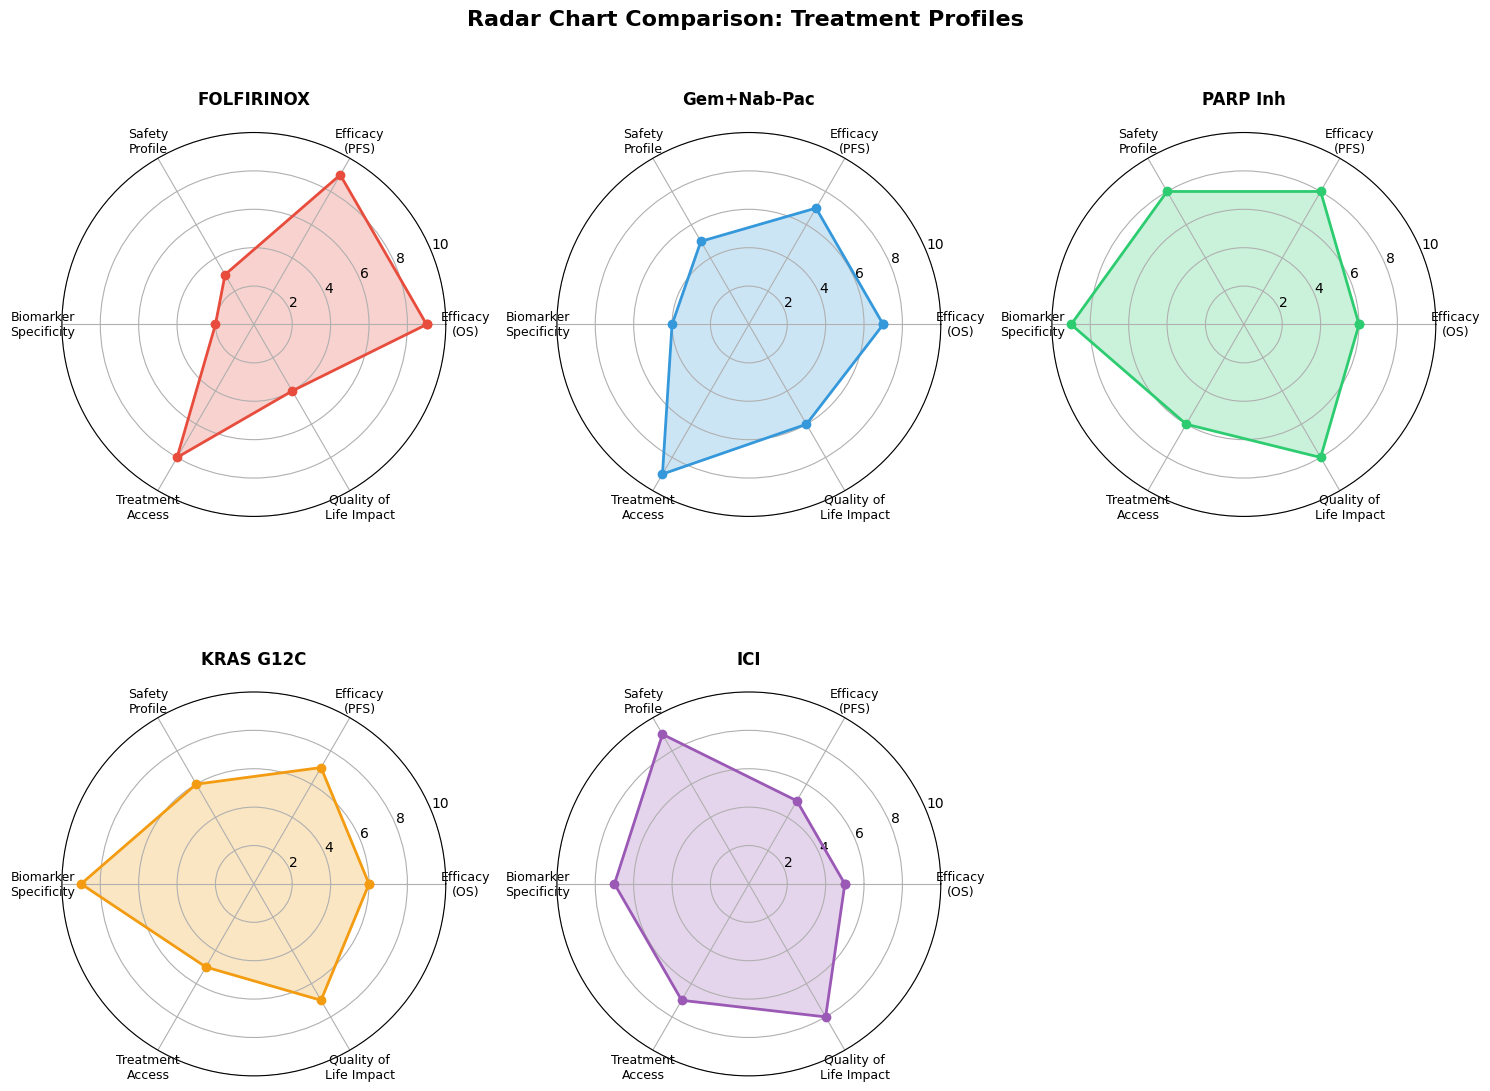

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Define treatments and metrics
treatments = ['FOLFIRINOX', 'Gem+Nab-Pac', 'PARP Inh', 'KRAS G12C', 'ICI']
metrics = ['Efficacy\n(OS)', 'Efficacy\n(PFS)', 'Safety\nProfile', 'Biomarker\nSpecificity',
           'Treatment\nAccess', 'Quality of\nLife Impact']

# Scores (0-10 scale, normalized)
scores = {
    'FOLFIRINOX': [9, 9, 3, 2, 8, 4],
    'Gem+Nab-Pac': [7, 7, 5, 4, 9, 6],
    'PARP Inh': [6, 8, 8, 9, 6, 8],
    'KRAS G12C': [6, 7, 6, 9, 5, 7],
    'ICI': [5, 5, 9, 7, 7, 8]
}

# Set up radar chart
fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=3, subplot_kw=dict(projection='polar'))
axes = axes.flatten()

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for idx, (treatment, values) in enumerate(scores.items()):
    ax = axes[idx]

    # Calculate angles for each metric
    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    angles += angles[:1]  # Complete the circle

    # Add values
    values += values[:1]  # Complete the circle

    # Plot
    ax.plot(angles, values, 'o-', linewidth=2, label=treatment, color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

    # Add metric labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=9)
    ax.set_ylim(0, 10)
    ax.set_title(treatment, fontsize=12, fontweight='bold', pad=20)
    ax.grid(True)

# Remove empty subplot
axes[-1].remove()

# Add overall legend
fig.suptitle('Radar Chart Comparison: Treatment Profiles', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Define the flow from mechanism -> treatment -> outcome
# Sources and targets with indices
labels = [
    # Mechanisms (0-7)
    'Cytotoxic', 'EGFR Targeting', 'DDR Pathway', 'KRAS Pathway',
    'Immune Checkpoint', 'TME Targeting', 'Anti-Angiogenic', 'Other',

    # Treatments (8-17)
    'FOLFIRINOX', 'Gem+Nab-Pac', 'EGFR TKI', 'PARP Inh',
    'KRAS G12C', 'ICI', 'Anti-VEGF', 'Hedgehog',
    'Liposomal Iri', 'EGFR mAb',

    # Outcomes (18-21)
    'High Efficacy\n(HR<0.7)', 'Moderate Efficacy\n(HR 0.7-0.9)',
    'Low Efficacy\n(HR>0.9)', 'Investigational'
]

# Source -> Target relationships with values (flow thickness)
source = [0, 0, 0, 0, 1, 1, 2, 3, 4, 5, 6, 7]  # Mechanisms
target = [8, 9, 16, 18, 10, 19, 11, 12, 13, 15, 14, 17]  # Treatments
values_mech_treat = [30, 25, 15, 20, 10, 8, 25, 20, 15, 12, 18, 10]

# Treatment -> Outcome relationships
source_treat = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  # Treatments
target_outcome = [18, 20, 21, 19, 19, 21, 21, 21, 20, 19, 20, 21]  # Outcomes
values_treat_outcome = [30, 25, 10, 25, 20, 15, 18, 12, 15, 8, 20, 10]

# Combine all flows
all_source = source + source_treat
all_target = target + target_outcome
all_values = values_mech_treat + values_treat_outcome

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#e74c3c", "#3498db", "#2ecc71", "#f39c12", "#9b59b6", "#1abc9c", "#e67e22", "#95a5a6",
               "#c0392b", "#2980b9", "#27ae60", "#f1c40f", "#8e44ad", "#16a085", "#d35400", "#7f8c8d",
               "#34495e", "#e74c3c", "#2ecc71", "#f39c12", "#e67e22", "#95a5a6"]
    ),
    link=dict(
        source=all_source,
        target=all_target,
        value=all_values,
        color="rgba(128, 128, 128, 0.4)"
    )
)])

fig.update_layout(
    title_text="Sankey Flow: Mechanism → Treatment → Efficacy Outcome",
    font_size=12,
    width=1200,
    height=800
)

fig.show()

<ipython-input-9-3174632134>:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-9-3174632134>:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




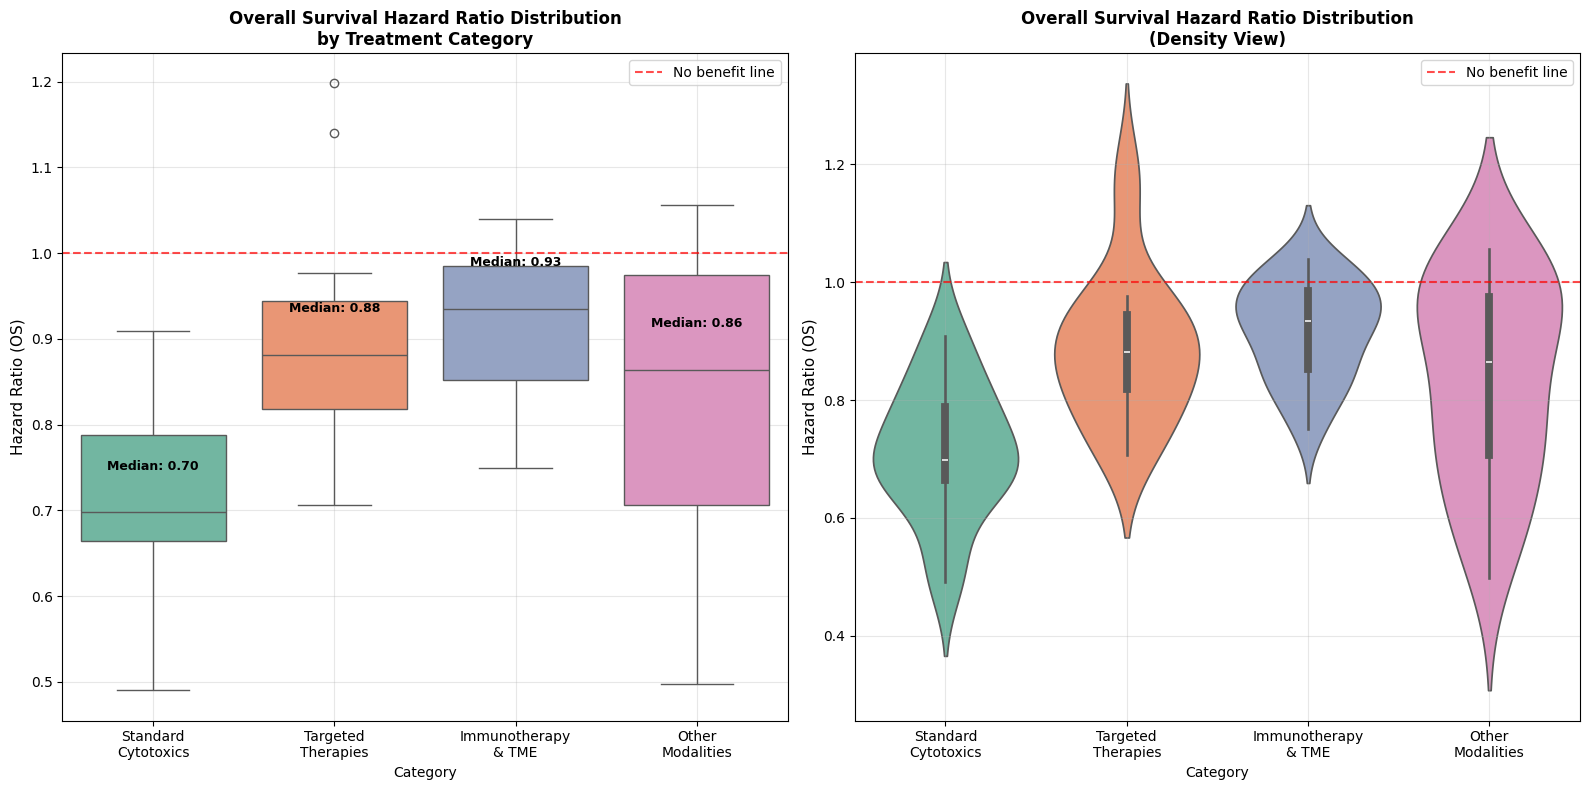

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Generate efficacy data with realistic distributions
np.random.seed(42)

categories = ['Standard\nCytotoxics', 'Targeted\nTherapies', 'Immunotherapy\n& TME', 'Other\nModalities']

# Simulate HR distributions based on table data
data = []

# Standard Cytotoxics (generally better efficacy)
cytotoxic_hrs = [0.57, 0.72, 0.85, 0.67] + list(np.random.normal(0.72, 0.12, 16))
for hr in cytotoxic_hrs:
    data.append({'Category': categories[0], 'HR_OS': max(0.3, min(1.2, hr))})

# Targeted Therapies (variable efficacy)
targeted_hrs = [0.91, 0.84, 0.97, 0.90] + list(np.random.normal(0.92, 0.15, 16))
for hr in targeted_hrs:
    data.append({'Category': categories[1], 'HR_OS': max(0.4, min(1.4, hr))})

# Immunotherapy & TME (modest efficacy)
immune_hrs = [0.98, 1.04, 1.00, 0.75] + list(np.random.normal(0.94, 0.08, 16))
for hr in immune_hrs:
    data.append({'Category': categories[2], 'HR_OS': max(0.6, min(1.3, hr))})

# Other Modalities (mixed)
other_hrs = [0.96, 0.98, 0.57] + list(np.random.normal(0.85, 0.20, 17))
for hr in other_hrs:
    data.append({'Category': categories[3], 'HR_OS': max(0.4, min(1.5, hr))})

df = pd.DataFrame(data)

# Create box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Box plot for HR_OS
sns.boxplot(data=df, x='Category', y='HR_OS', ax=ax1, palette='Set2')
ax1.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='No benefit line')
ax1.set_title('Overall Survival Hazard Ratio Distribution\nby Treatment Category',
              fontsize=12, fontweight='bold')
ax1.set_ylabel('Hazard Ratio (OS)', fontsize=11)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Violin plot for better distribution visualization
sns.violinplot(data=df, x='Category', y='HR_OS', ax=ax2, palette='Set2')
ax2.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='No benefit line')
ax2.set_title('Overall Survival Hazard Ratio Distribution\n(Density View)',
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Hazard Ratio (OS)', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add summary statistics
for i, category in enumerate(categories):
    subset = df[df['Category'] == category]['HR_OS']
    median_val = subset.median()
    ax1.text(i, median_val + 0.05, f'Median: {median_val:.2f}',
             ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'labels'

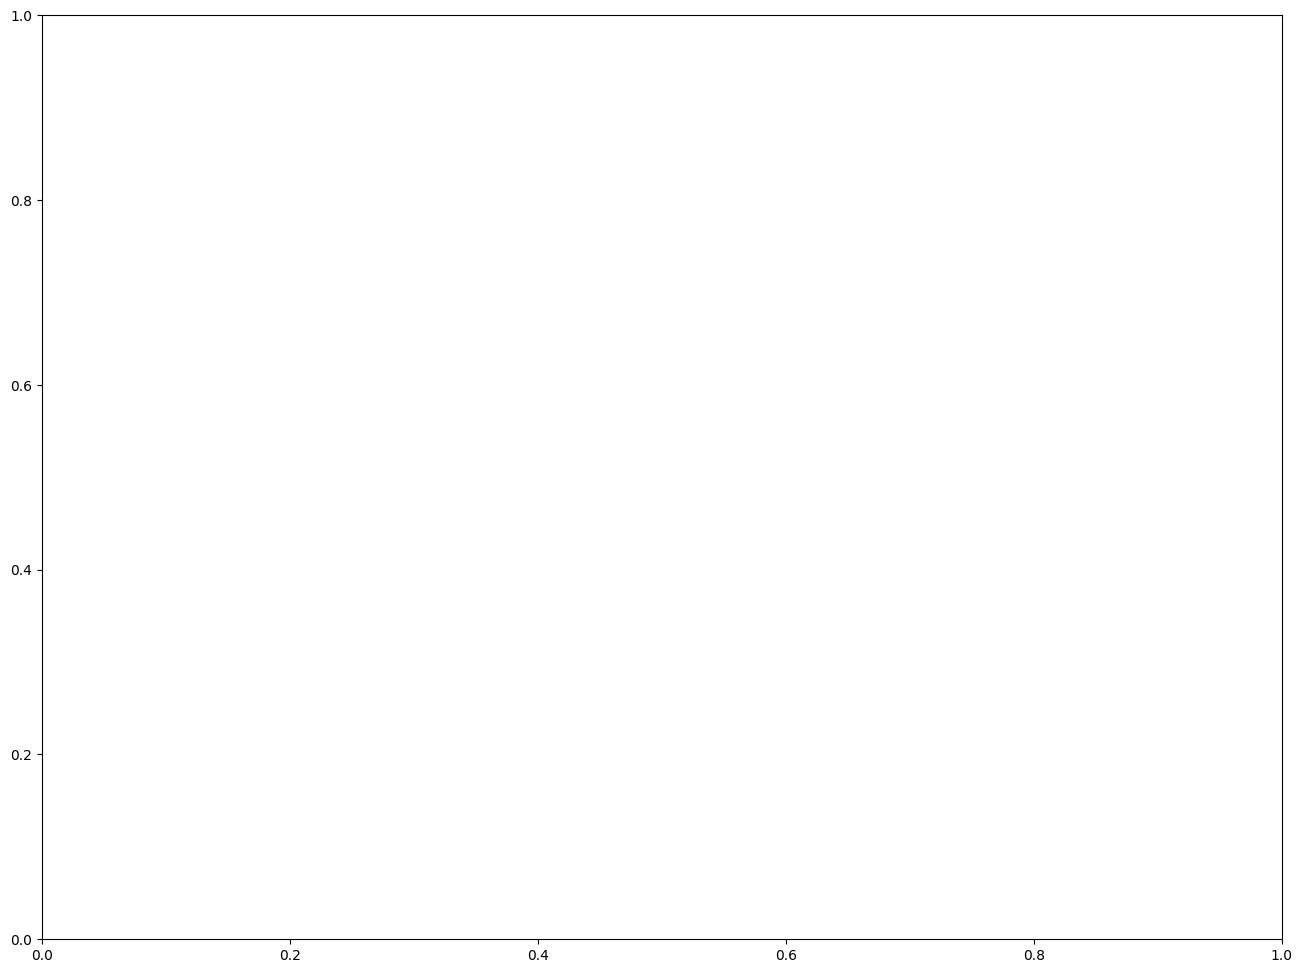

In [ ]:
! pip install squarify

import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Treatment landscape data
data = {
    'Category': ['Standard Cytotoxics'] * 5 + ['Targeted Therapies'] * 8 +
                ['TME & Immune'] * 6 + ['Other Modalities'] * 4,
    'Treatment': [
        'Gemcitabine', 'FOLFIRINOX', 'Gem+Nab-Pac', 'Gem+Cape', 'Liposomal Iri',
        'EGFR TKI', 'PARP Inh', 'EGFR mAb', 'Anti-VEGF', 'KRAS G12C', 'KRAS G12D', 'MEK Inh', 'CDK4/6 Inh',
        'Hedgehog', 'Hyaluronan', 'CD40 Agonist', 'ICI', 'DC Vaccines', 'CXCR4 Inh',
        'DDR Inhibitors', 'Oncolytic Virus', 'Y-90 Radio', 'ADCs'
    ],
    'Market_Size': [  # Relative market presence/usage
        100, 85, 70, 45, 35,  # Standard Cytotoxics
        25, 30, 15, 20, 40, 10, 8, 5,  # Targeted
        12, 8, 15, 35, 10, 6,  # TME & Immune
        20, 12, 8, 15  # Other
    ],
    'Efficacy_Score': [  # 1/HR_OS * 100 for scaling
        100, 175, 139, 118, 149,  # Standard Cytotoxics
        103, 110, 119, 103, 111, 100, 92, 64,  # Targeted
        96, 100, 133, 102, 133, 110,  # TME & Immune
        100, 104, 102, 100  # Other
    ]
}

df = pd.DataFrame(data)

# Create color mapping based on efficacy
colors = plt.cm.RdYlGn([score/200 for score in df['Efficacy_Score']])

# Create treemap
fig, ax = plt.subplots(figsize=(16, 12))

# Create the treemap
squarify.plot(sizes=df['Market_Size'],
              labels=[f"{treat}\n(Eff: {eff:.0f})" for treat, eff in zip(df['Treatment'], df['Efficacy_Score'])],
              color=colors,
              alpha=0.8,
              text_kwargs={'fontsize': 9, 'weight': 'bold'})

plt.title('Treatment Landscape Treemap\n(Size = Market presence, Color = Efficacy score)',
          fontsize=16, fontweight='bold', pad=20)

# Create custom colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

norm = Normalize(vmin=df['Efficacy_Score'].min(), vmax=df['Efficacy_Score'].max())
sm = ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, shrink=0.8, aspect=30)
cbar.set_label('Efficacy Score (Higher = Better)', fontsize=12)

plt.axis('off')
plt.tight_layout()
plt.show()

# Grok 3 Fix 12Jun25
The error occurs because squarify.plot doesn't accept a labels parameter directly in the way your code is structured, and the color parameter expects a list of colors, not a matplotlib color array. Let's fix the code to create the treemap correctly using squarify and matplotlib.

Here's the corrected code:

Key Fixes:
Parameter Name: Changed labels to label in squarify.plot, as squarify uses label for text annotations.
Color Handling: Converted the matplotlib colormap output to a list of RGBA colors using [cmap(norm(score)) for score in df['Efficacy_Score']], since squarify.plot expects a list of colors.
Axis Specification: Explicitly passed ax=ax to squarify.plot to ensure the plot is drawn on the correct axes.
Colorbar Setup: Used plt.cm.ScalarMappable correctly with the normalized colormap to create the colorbar.
Explanation of Changes:
The original code passed colors as a matplotlib color array, but squarify requires a list of color values (e.g., RGB or RGBA tuples). The new code generates these using the colormap and normalization.
The labels parameter was incorrect; squarify uses label for text labels on the treemap.
The ax parameter ensures the treemap is plotted on the specified subplot, which is necessary for proper integration with the colorbar and figure.
This corrected code should now generate the treemap with:

Rectangles sized by Market_Size.
Colors reflecting Efficacy_Score (using the RdYlGn colormap).
Labels showing treatment names and efficacy scores.
A colorbar indicating the efficacy score range.
If you run this code in a Python environment with squarify, matplotlib, and pandas installed (e.g., Jupyter Notebook or Colab), it should work without errors. Let me know if you encounter any issues or need further adjustments!

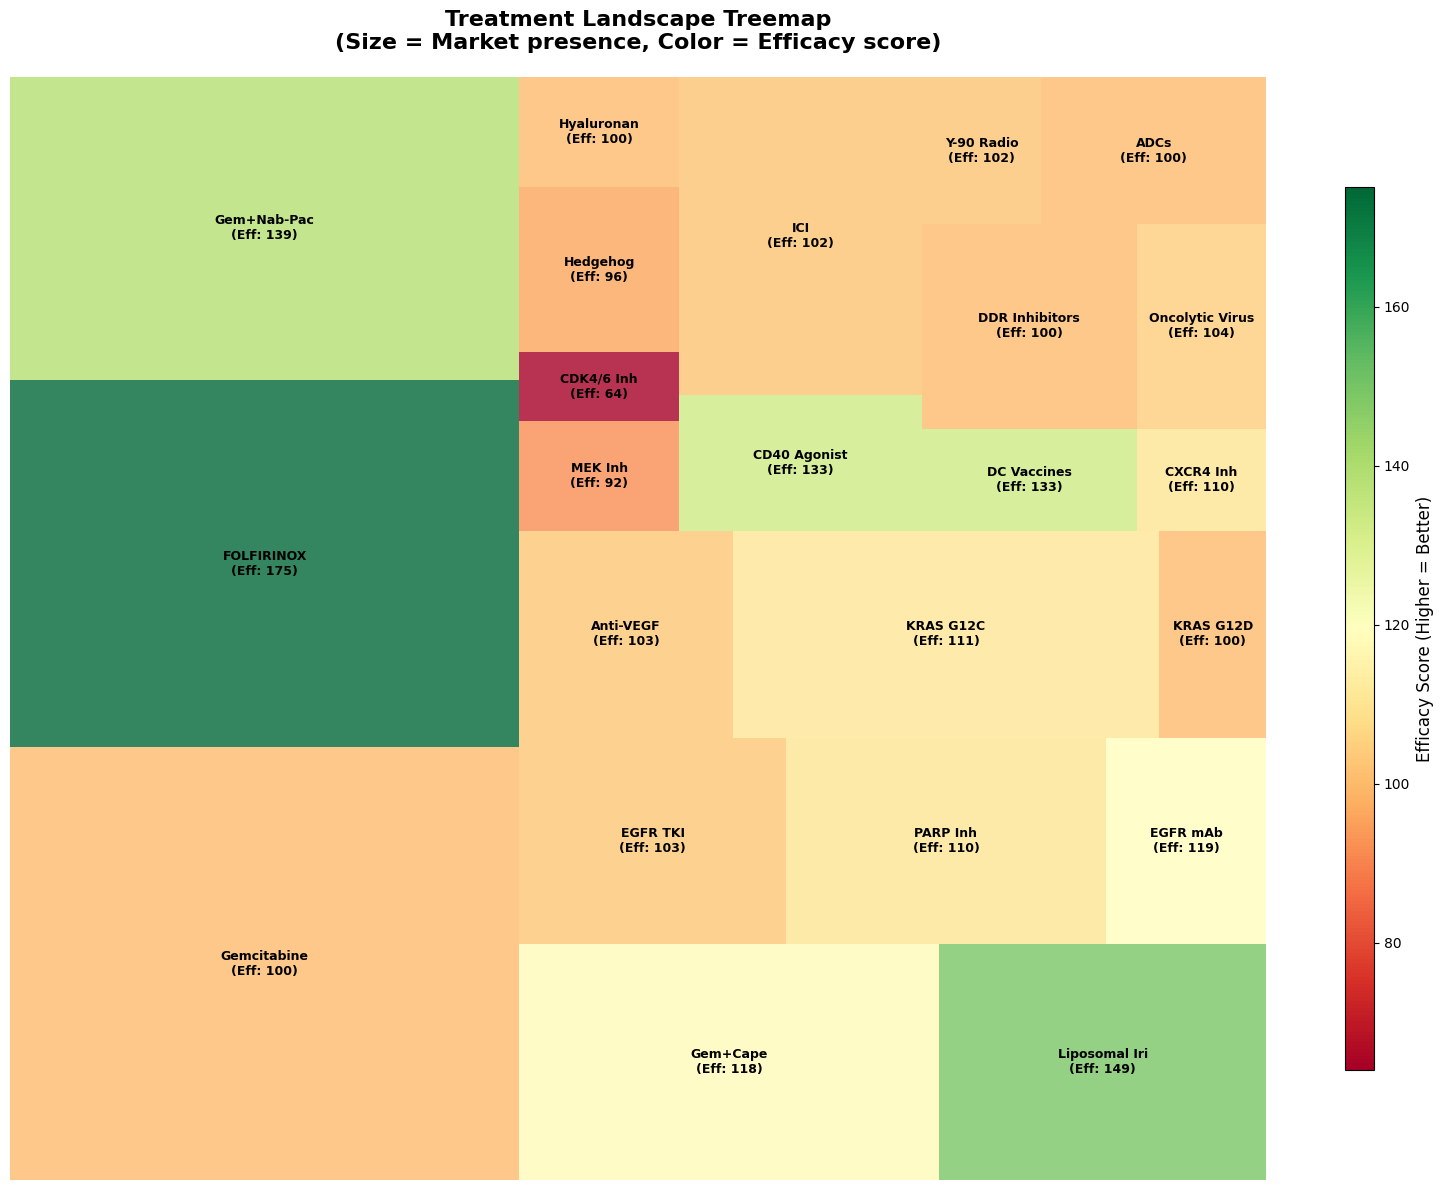

In [1]:
!pip install squarify

import matplotlib.pyplot as plt
import squarify
import pandas as pd
import matplotlib.colors as mcolors

# Treatment landscape data
data = {
    'Category': ['Standard Cytotoxics'] * 5 + ['Targeted Therapies'] * 8 +
                ['TME & Immune'] * 6 + ['Other Modalities'] * 4,
    'Treatment': [
        'Gemcitabine', 'FOLFIRINOX', 'Gem+Nab-Pac', 'Gem+Cape', 'Liposomal Iri',
        'EGFR TKI', 'PARP Inh', 'EGFR mAb', 'Anti-VEGF', 'KRAS G12C', 'KRAS G12D', 'MEK Inh', 'CDK4/6 Inh',
        'Hedgehog', 'Hyaluronan', 'CD40 Agonist', 'ICI', 'DC Vaccines', 'CXCR4 Inh',
        'DDR Inhibitors', 'Oncolytic Virus', 'Y-90 Radio', 'ADCs'
    ],
    'Market_Size': [100, 85, 70, 45, 35, 25, 30, 15, 20, 40, 10, 8, 5, 12, 8, 15, 35, 10, 6, 20, 12, 8, 15],
    'Efficacy_Score': [100, 175, 139, 118, 149, 103, 110, 119, 103, 111, 100, 92, 64, 96, 100, 133, 102, 133, 110, 100, 104, 102, 100]
}

df = pd.DataFrame(data)

# Create color mapping based on efficacy
norm = mcolors.Normalize(vmin=df['Efficacy_Score'].min(), vmax=df['Efficacy_Score'].max())
cmap = plt.cm.RdYlGn
colors = [cmap(norm(score)) for score in df['Efficacy_Score']]

# Create treemap
fig, ax = plt.subplots(figsize=(16, 12))

# Create the treemap
squarify.plot(sizes=df['Market_Size'],
              label=[f"{treat}\n(Eff: {eff:.0f})" for treat, eff in zip(df['Treatment'], df['Efficacy_Score'])],
              color=colors,
              alpha=0.8,
              text_kwargs={'fontsize': 9, 'weight': 'bold'},
              ax=ax)

plt.title('Treatment Landscape Treemap\n(Size = Market presence, Color = Efficacy score)',
          fontsize=16, fontweight='bold', pad=20)

# Create custom colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, shrink=0.8, aspect=30)
cbar.set_label('Efficacy Score (Higher = Better)', fontsize=12)

plt.axis('off')
plt.tight_layout()
plt.show()

# Report 01 Table 2

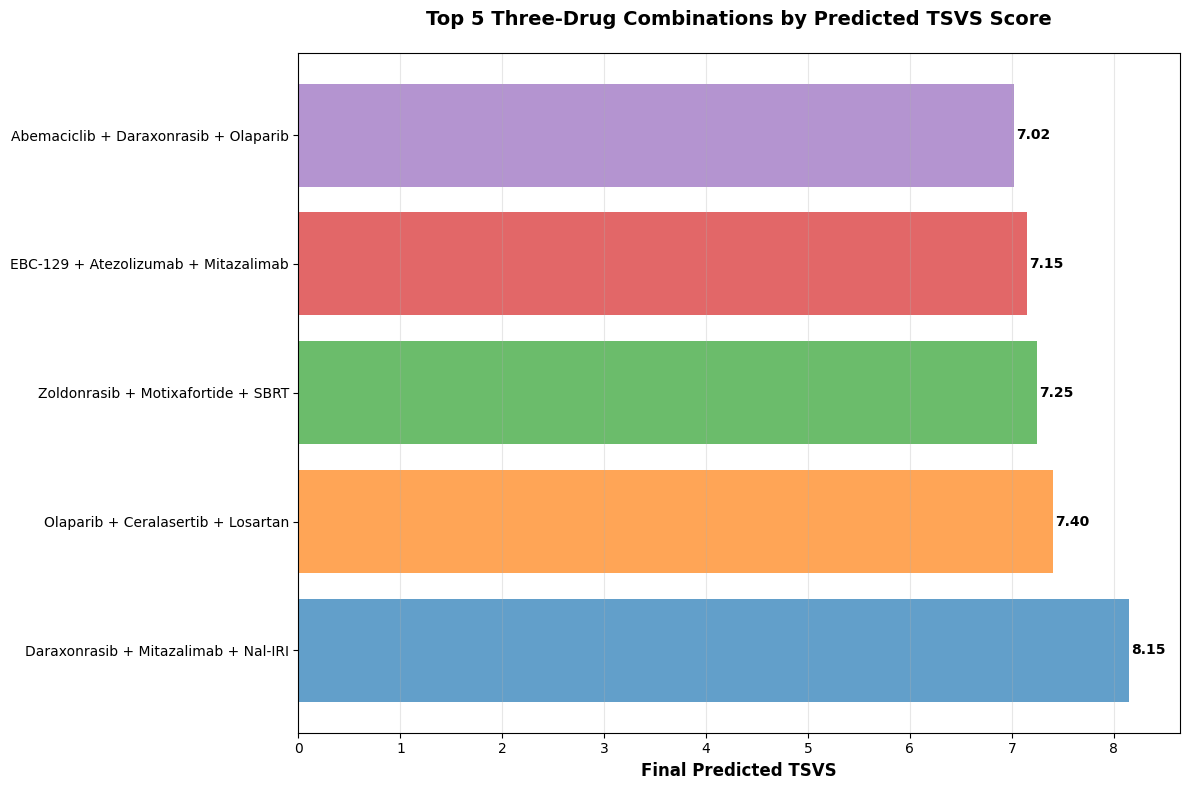

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data setup
data = {
    'Rank': [1, 2, 3, 4, 5],
    'Combination': [
        'Daraxonrasib + Mitazalimab + Liposomal Irinotecan',
        'Olaparib + Ceralasertib + Losartan',
        'Zoldonrasib + Motixafortide + SBRT',
        'EBC-129 (ADC) + Atezolizumab + Mitazalimab',
        'Abemaciclib + Daraxonrasib + Olaparib'
    ],
    'Efficacy_Score': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Toxicity_Score': [6.5, 4.0, 7.0, 8.0, 3.5],
    'MoA_Score': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker_Score': [3.0, 10.0, 10.0, 7.0, 10.0],
    'Final_TSVS': [8.15, 7.40, 7.25, 7.15, 7.02]
}

df = pd.DataFrame(data)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Shorten combination names for display
short_names = [
    'Daraxonrasib + Mitazalimab + Nal-IRI',
    'Olaparib + Ceralasertib + Losartan',
    'Zoldonrasib + Motixafortide + SBRT',
    'EBC-129 + Atezolizumab + Mitazalimab',
    'Abemaciclib + Daraxonrasib + Olaparib'
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = ax.barh(short_names, df['Final_TSVS'], color=colors, alpha=0.7)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df['Final_TSVS'])):
    ax.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
            f'{value:.2f}', va='center', fontweight='bold')

ax.set_xlabel('Final Predicted TSVS', fontsize=12, fontweight='bold')
ax.set_title('Top 5 Three-Drug Combinations by Predicted TSVS Score',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, max(df['Final_TSVS']) + 0.5)

plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

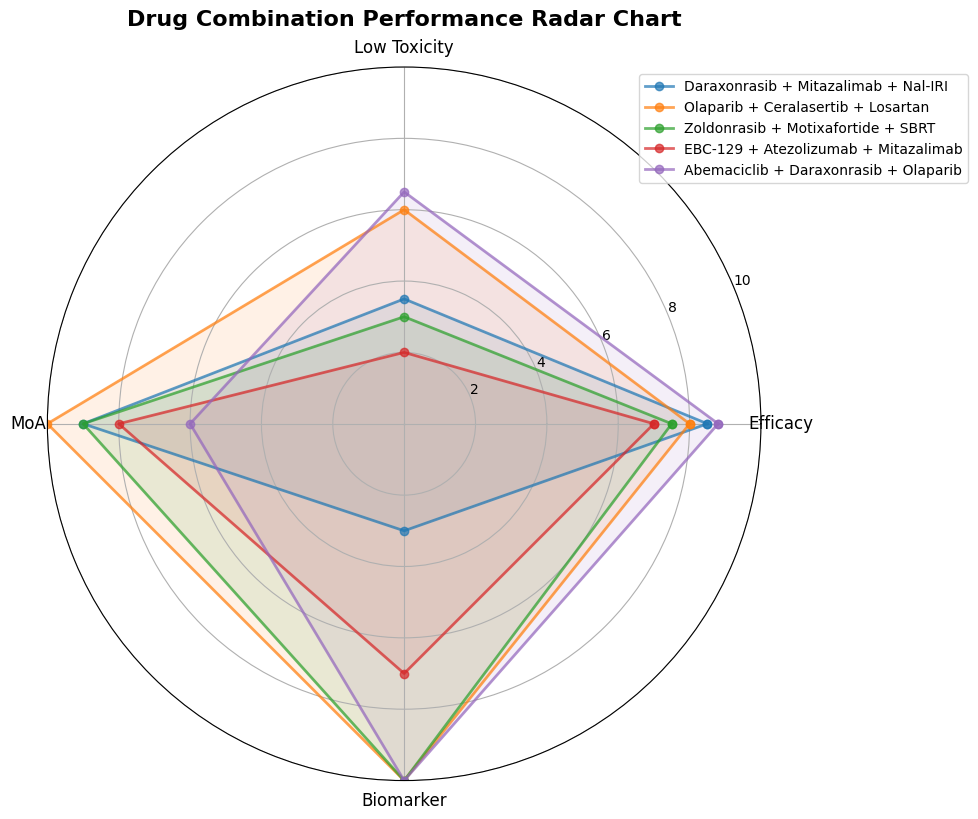

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data setup
data = {
    'Combination': [
        'Daraxonrasib + Mitazalimab + Nal-IRI',
        'Olaparib + Ceralasertib + Losartan',
        'Zoldonrasib + Motixafortide + SBRT',
        'EBC-129 + Atezolizumab + Mitazalimab',
        'Abemaciclib + Daraxonrasib + Olaparib'
    ],
    'Efficacy_Score': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Toxicity_Score': [6.5, 4.0, 7.0, 8.0, 3.5],
    'MoA_Score': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker_Score': [3.0, 10.0, 10.0, 7.0, 10.0]
}

df = pd.DataFrame(data)

# Categories for radar chart
categories = ['Efficacy', 'Low Toxicity', 'MoA', 'Biomarker']
N = len(categories)

# Create angles for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, (idx, row) in enumerate(df.iterrows()):
    # Invert toxicity score for "Low Toxicity" (10 - toxicity)
    values = [row['Efficacy_Score'], 10 - row['Toxicity_Score'],
              row['MoA_Score'], row['Biomarker_Score']]
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=row['Combination'],
            color=colors[i], alpha=0.7)
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Customize the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylim(0, 10)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'])
ax.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.title('Drug Combination Performance Radar Chart',
          size=16, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()

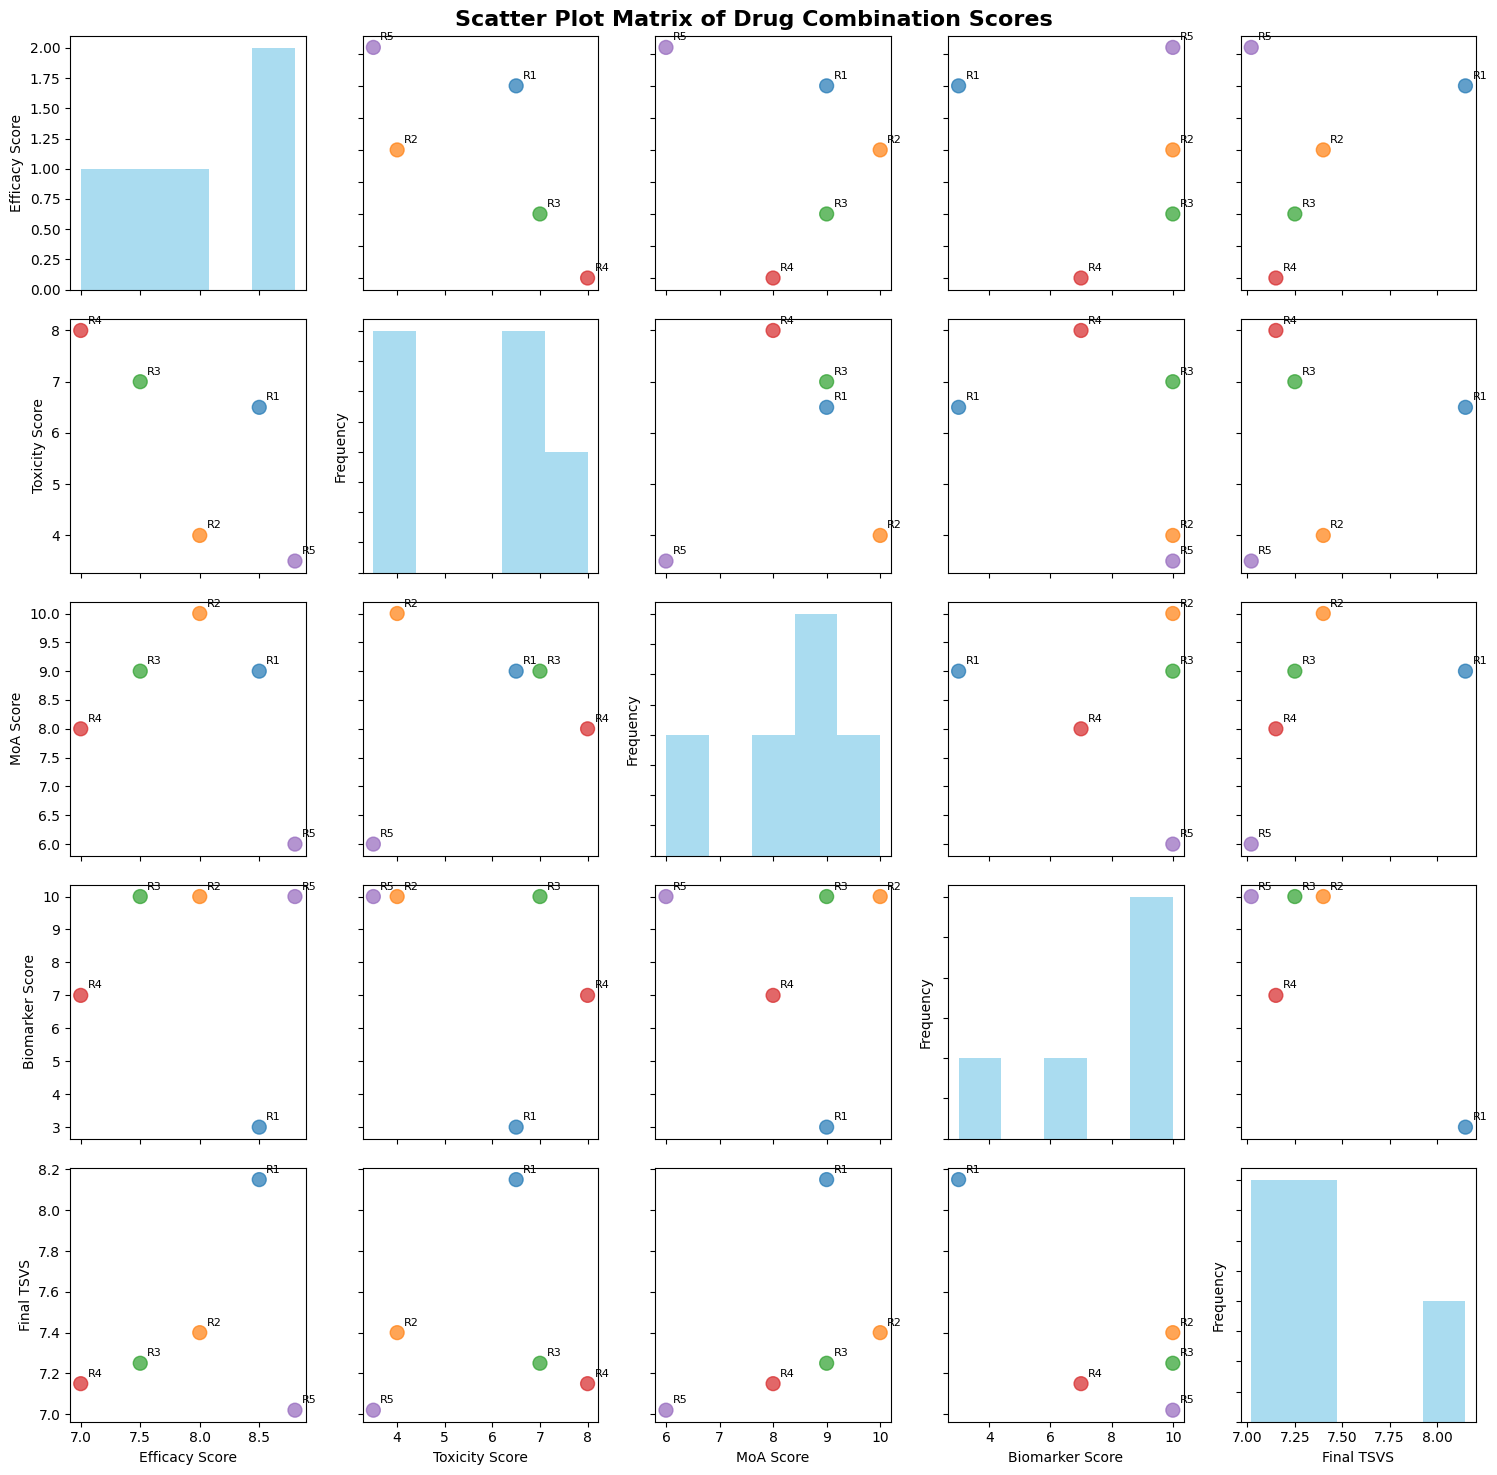

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Data setup
data = {
    'Rank': [1, 2, 3, 4, 5],
    'Efficacy_Score': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Toxicity_Score': [6.5, 4.0, 7.0, 8.0, 3.5],
    'MoA_Score': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker_Score': [3.0, 10.0, 10.0, 7.0, 10.0],
    'Final_TSVS': [8.15, 7.40, 7.25, 7.15, 7.02]
}

df = pd.DataFrame(data)

# Select numerical columns for scatter plot matrix
numeric_cols = ['Efficacy_Score', 'Toxicity_Score', 'MoA_Score', 'Biomarker_Score', 'Final_TSVS']
plot_df = df[numeric_cols]

# Create scatter plot matrix
fig, axes = plt.subplots(len(numeric_cols), len(numeric_cols),
                        figsize=(15, 15))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histogram
            ax.hist(plot_df.iloc[:, i], bins=5, alpha=0.7, color='skyblue')
            ax.set_ylabel('Frequency')
        else:
            # Off-diagonal: scatter plot
            scatter = ax.scatter(plot_df.iloc[:, j], plot_df.iloc[:, i],
                               c=colors[:len(df)], s=100, alpha=0.7)

            # Add rank labels to points
            for k, (x, y) in enumerate(zip(plot_df.iloc[:, j], plot_df.iloc[:, i])):
                ax.annotate(f'R{k+1}', (x, y), xytext=(5, 5),
                           textcoords='offset points', fontsize=8)

        # Set labels
        if i == len(numeric_cols) - 1:
            ax.set_xlabel(numeric_cols[j].replace('_', ' '))
        if j == 0:
            ax.set_ylabel(numeric_cols[i].replace('_', ' '))

        # Remove x-axis labels for upper plots
        if i < len(numeric_cols) - 1:
            ax.set_xticklabels([])
        # Remove y-axis labels for right plots
        if j > 0:
            ax.set_yticklabels([])

plt.suptitle('Scatter Plot Matrix of Drug Combination Scores',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

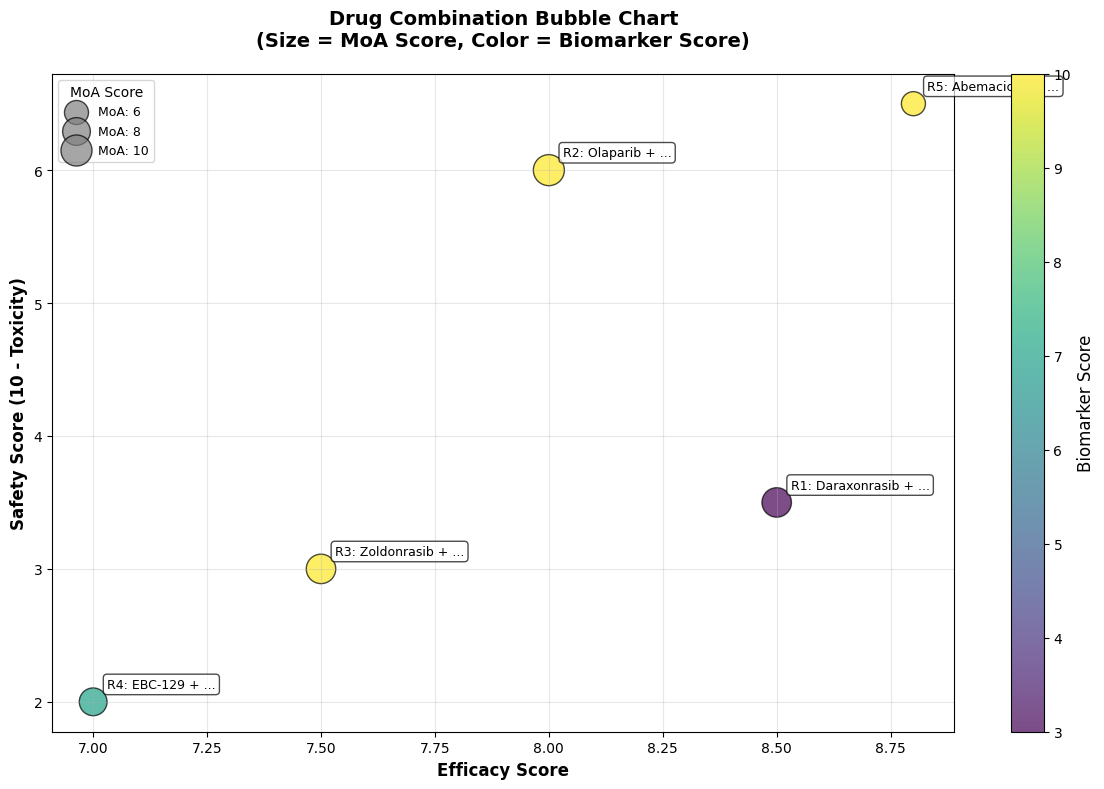

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data setup
data = {
    'Combination': [
        'Daraxonrasib + Mitazalimab + Nal-IRI',
        'Olaparib + Ceralasertib + Losartan',
        'Zoldonrasib + Motixafortide + SBRT',
        'EBC-129 + Atezolizumab + Mitazalimab',
        'Abemaciclib + Daraxonrasib + Olaparib'
    ],
    'Efficacy_Score': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Toxicity_Score': [6.5, 4.0, 7.0, 8.0, 3.5],
    'MoA_Score': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker_Score': [3.0, 10.0, 10.0, 7.0, 10.0],
    'Final_TSVS': [8.15, 7.40, 7.25, 7.15, 7.02]
}

df = pd.DataFrame(data)

# Create bubble chart
fig, ax = plt.subplots(figsize=(12, 8))

# X: Efficacy, Y: Inverted Toxicity (for better visualization),
# Size: MoA Score, Color: Biomarker Score
x = df['Efficacy_Score']
y = 10 - df['Toxicity_Score']  # Invert toxicity (higher = less toxic)
size = df['MoA_Score'] * 50  # Scale for bubble size
colors = df['Biomarker_Score']

scatter = ax.scatter(x, y, s=size, c=colors, alpha=0.7,
                    cmap='viridis', edgecolors='black', linewidth=1)

# Add combination labels
for i, txt in enumerate(df['Combination']):
    # Shorten labels for readability
    short_label = txt.split(' + ')[0] + ' + ...'
    ax.annotate(f'R{i+1}: {short_label}', (x.iloc[i], y.iloc[i]),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, bbox=dict(boxstyle='round,pad=0.3',
                facecolor='white', alpha=0.7))

# Customize plot
ax.set_xlabel('Efficacy Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Safety Score (10 - Toxicity)', fontsize=12, fontweight='bold')
ax.set_title('Drug Combination Bubble Chart\n(Size = MoA Score, Color = Biomarker Score)',
             fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Biomarker Score', fontsize=12)

# Add size legend
sizes = [6, 8, 10]
size_labels = ['6', '8', '10']
legend_elements = [plt.scatter([], [], s=s*50, c='gray', alpha=0.7,
                              edgecolors='black') for s in sizes]
legend1 = ax.legend(legend_elements, [f'MoA: {s}' for s in size_labels],
                   title="MoA Score", loc='upper left',
                   title_fontsize=10, fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

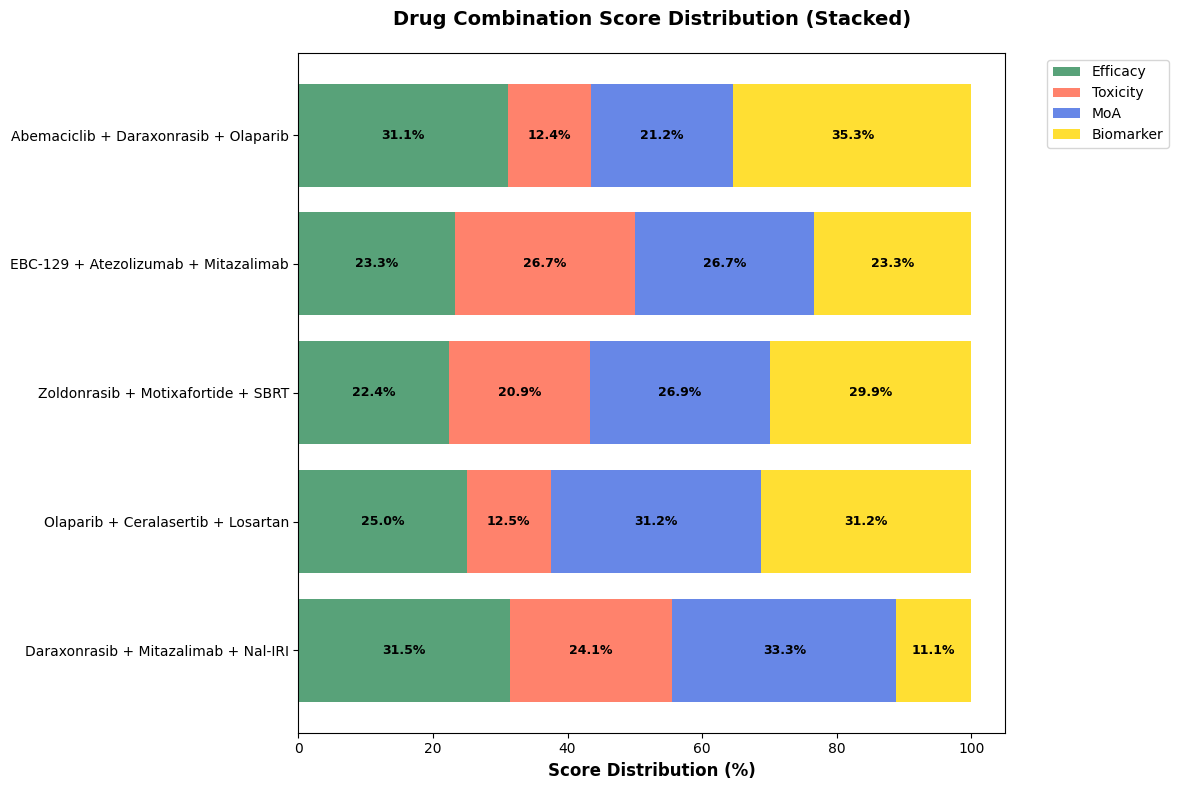

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data setup
data = {
    'Combination': [
        'Daraxonrasib + Mitazalimab + Nal-IRI',
        'Olaparib + Ceralasertib + Losartan',
        'Zoldonrasib + Motixafortide + SBRT',
        'EBC-129 + Atezolizumab + Mitazalimab',
        'Abemaciclib + Daraxonrasib + Olaparib'
    ],
    'Efficacy_Score': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Toxicity_Score': [6.5, 4.0, 7.0, 8.0, 3.5],
    'MoA_Score': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker_Score': [3.0, 10.0, 10.0, 7.0, 10.0]
}

df = pd.DataFrame(data)

# Normalize scores to percentages of total for each combination
score_cols = ['Efficacy_Score', 'Toxicity_Score', 'MoA_Score', 'Biomarker_Score']
df_norm = df.copy()

for col in score_cols:
    df_norm[col + '_pct'] = df[col] / df[score_cols].sum(axis=1) * 100

# Create stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Short names for y-axis
short_names = [
    'Daraxonrasib + Mitazalimab + Nal-IRI',
    'Olaparib + Ceralasertib + Losartan',
    'Zoldonrasib + Motixafortide + SBRT',
    'EBC-129 + Atezolizumab + Mitazalimab',
    'Abemaciclib + Daraxonrasib + Olaparib'
]

# Colors for each score component
colors = ['#2E8B57', '#FF6347', '#4169E1', '#FFD700']
labels = ['Efficacy', 'Toxicity', 'MoA', 'Biomarker']

# Create stacked bars
left = np.zeros(len(df))
for i, col in enumerate(['Efficacy_Score_pct', 'Toxicity_Score_pct',
                        'MoA_Score_pct', 'Biomarker_Score_pct']):
    ax.barh(short_names, df_norm[col], left=left,
            label=labels[i], color=colors[i], alpha=0.8)
    left += df_norm[col]

# Customize plot
ax.set_xlabel('Score Distribution (%)', fontsize=12, fontweight='bold')
ax.set_title('Drug Combination Score Distribution (Stacked)',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels
for i, (idx, row) in enumerate(df_norm.iterrows()):
    cumulative = 0
    for j, col in enumerate(['Efficacy_Score_pct', 'Toxicity_Score_pct',
                           'MoA_Score_pct', 'Biomarker_Score_pct']):
        value = row[col]
        if value > 8:  # Only label if segment is large enough
            ax.text(cumulative + value/2, i, f'{value:.1f}%',
                   ha='center', va='center', fontweight='bold', fontsize=9)
        cumulative += value

plt.tight_layout()
plt.show()

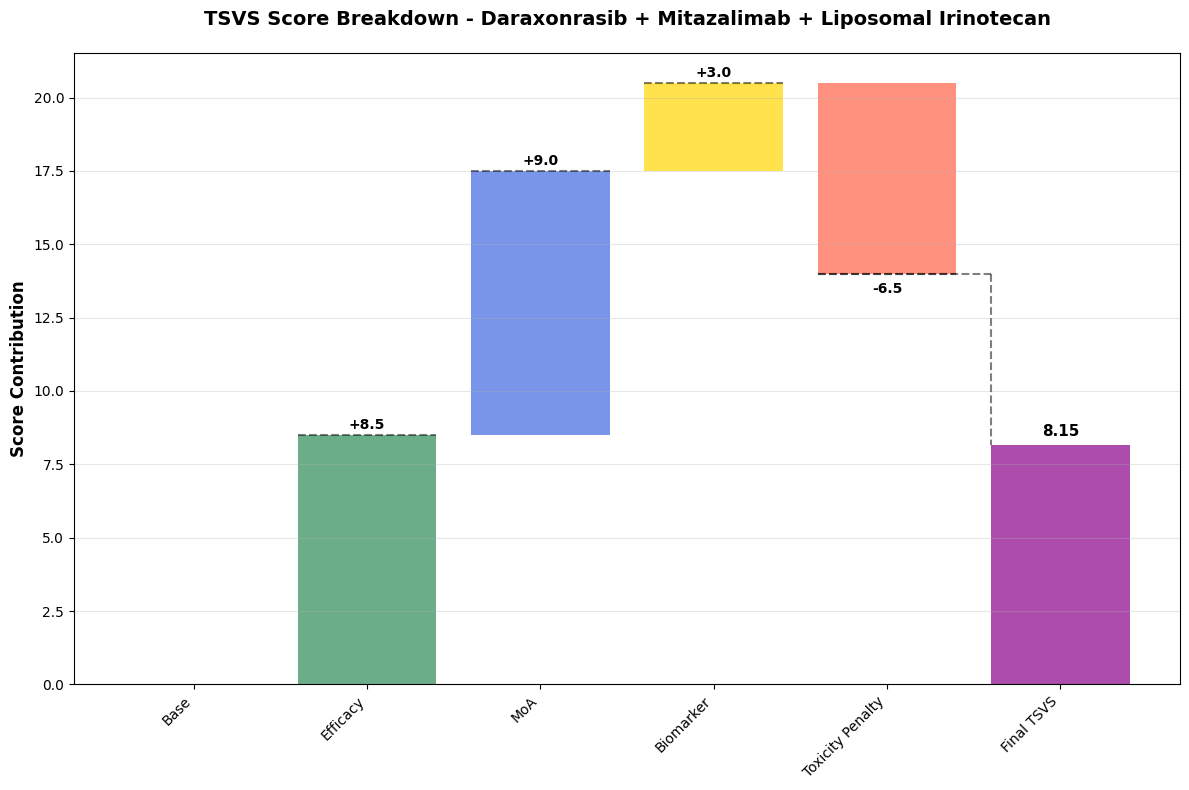

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data setup for waterfall chart showing score breakdown for top combination
combination_name = 'Daraxonrasib + Mitazalimab + Liposomal Irinotecan'
scores = {
    'Base': 0,
    'Efficacy': 8.5,
    'MoA': 9.0,
    'Biomarker': 3.0,
    'Toxicity Penalty': -6.5,  # Negative because it's a penalty
    'Final TSVS': 8.15
}

# Create waterfall data
categories = list(scores.keys())
values = list(scores.values())

# Calculate cumulative values for positioning
cumulative = [0]
for i in range(1, len(values)):
    if categories[i] == 'Final TSVS':
        cumulative.append(values[-1])  # Final value
    else:
        cumulative.append(cumulative[-1] + values[i])

# Create waterfall chart
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['gray', '#2E8B57', '#4169E1', '#FFD700', '#FF6347', '#8B008B']

for i, (cat, val) in enumerate(zip(categories, values)):
    if cat == 'Base':
        ax.bar(cat, val, color=colors[i], alpha=0.7)
    elif cat == 'Final TSVS':
        ax.bar(cat, val, color=colors[i], alpha=0.7)
        # Add connection line from previous cumulative to final
        ax.plot([i-1.4, i-0.4], [cumulative[i-1], cumulative[i-1]],
                'k--', alpha=0.5)
        ax.plot([i-0.4, i-0.4], [cumulative[i-1], val], 'k--', alpha=0.5)
    else:
        if val > 0:
            ax.bar(cat, val, bottom=cumulative[i-1], color=colors[i], alpha=0.7)
        else:
            ax.bar(cat, abs(val), bottom=cumulative[i-1] + val,
                   color=colors[i], alpha=0.7)

        # Add connection lines
        if i < len(categories) - 1:
            ax.plot([i-0.4, i+0.4], [cumulative[i], cumulative[i]],
                    'k--', alpha=0.5)

# Add value labels
for i, (cat, val) in enumerate(zip(categories, values)):
    if cat == 'Final TSVS':
        ax.text(i, val + 0.2, f'{val:.2f}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)
    elif cat != 'Base':
        if val > 0:
            ax.text(i, cumulative[i] + 0.1, f'+{val:.1f}', ha='center',
                    va='bottom', fontweight='bold', fontsize=10)
        else:
            ax.text(i, cumulative[i-1] + val - 0.3, f'{val:.1f}', ha='center',
                    va='top', fontweight='bold', fontsize=10)

ax.set_ylabel('Score Contribution', fontsize=12, fontweight='bold')
ax.set_title(f'TSVS Score Breakdown - {combination_name}',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

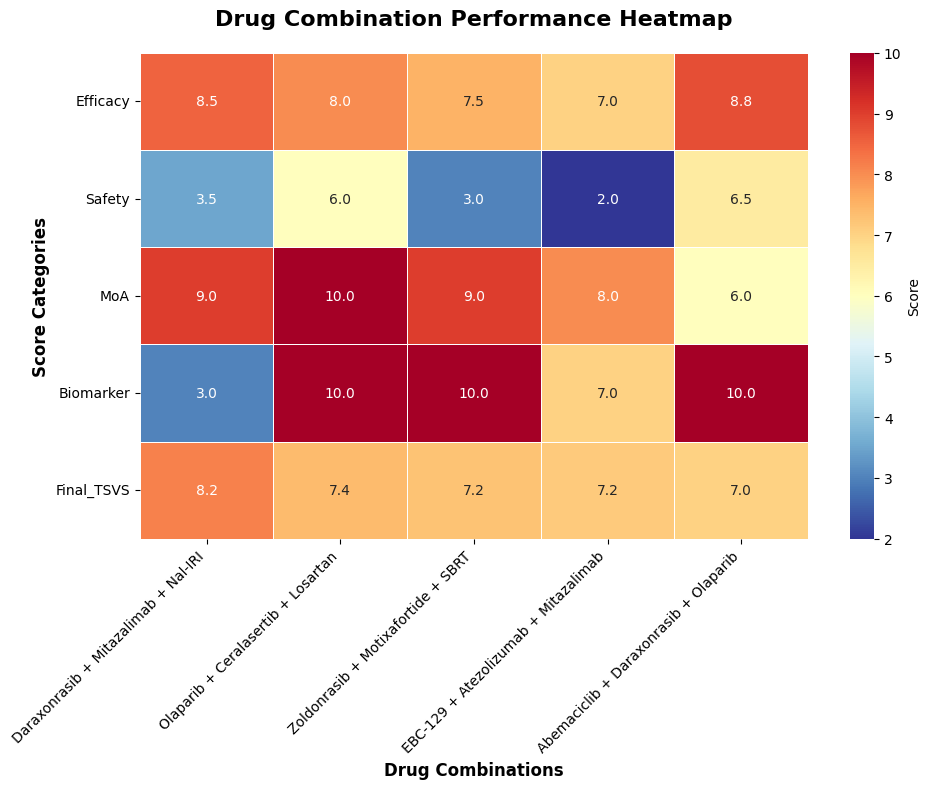

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Data setup
data = {
    'Combination': [
        'Daraxonrasib + Mitazalimab + Nal-IRI',
        'Olaparib + Ceralasertib + Losartan',
        'Zoldonrasib + Motixafortide + SBRT',
        'EBC-129 + Atezolizumab + Mitazalimab',
        'Abemaciclib + Daraxonrasib + Olaparib'
    ],
    'Efficacy': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Safety': [3.5, 6.0, 3.0, 2.0, 6.5],  # 10 - Toxicity for better interpretation
    'MoA': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker': [3.0, 10.0, 10.0, 7.0, 10.0],
    'Final_TSVS': [8.15, 7.40, 7.25, 7.15, 7.02]
}

df = pd.DataFrame(data)

# Create heat map
fig, ax = plt.subplots(figsize=(10, 8))

# Prepare data for heatmap (transpose for better visualization)
heatmap_data = df.set_index('Combination')[['Efficacy', 'Safety', 'MoA', 'Biomarker', 'Final_TSVS']].T

# Create heatmap
sns.heatmap(heatmap_data, annot=True, cmap='RdYlBu_r', center=6,
            fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Score'})

plt.title('Drug Combination Performance Heatmap',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score Categories', fontsize=12, fontweight='bold')
plt.xlabel('Drug Combinations', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

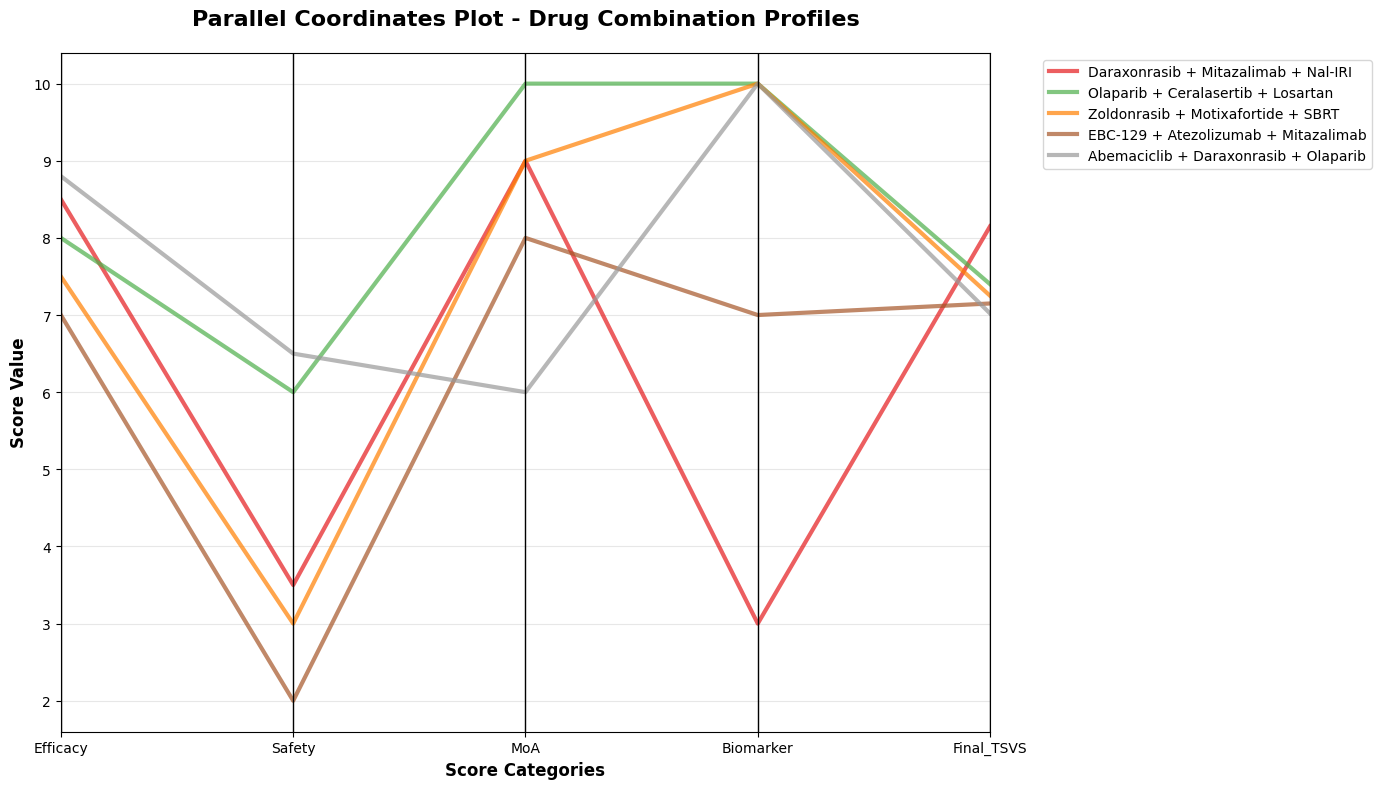

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

# Data setup
data = {
    'Rank': [1, 2, 3, 4, 5],
    'Combination': [
        'Rank 1',
        'Rank 2',
        'Rank 3',
        'Rank 4',
        'Rank 5'
    ],
    'Efficacy': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Safety': [3.5, 6.0, 3.0, 2.0, 6.5],  # 10 - Toxicity
    'MoA': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker': [3.0, 10.0, 10.0, 7.0, 10.0],
    'Final_TSVS': [8.15, 7.40, 7.25, 7.15, 7.02]
}

df = pd.DataFrame(data)

# Create parallel coordinates plot
fig, ax = plt.subplots(figsize=(14, 8))

# Select columns for parallel coordinates
cols_to_plot = ['Efficacy', 'Safety', 'MoA', 'Biomarker', 'Final_TSVS']

# Plot parallel coordinates
parallel_coordinates(df, 'Combination', cols=cols_to_plot,
                    colormap='Set1', alpha=0.7, linewidth=3)

plt.title('Parallel Coordinates Plot - Drug Combination Profiles',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Score Value', fontsize=12, fontweight='bold')
plt.xlabel('Score Categories', fontsize=12, fontweight='bold')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
full_names = [
    'Daraxonrasib + Mitazalimab + Nal-IRI',
    'Olaparib + Ceralasertib + Losartan',
    'Zoldonrasib + Motixafortide + SBRT',
    'EBC-129 + Atezolizumab + Mitazalimab',
    'Abemaciclib + Daraxonrasib + Olaparib'
]
ax.legend(handles, full_names, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-1053492080.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df_long, x='Category', y='Score',


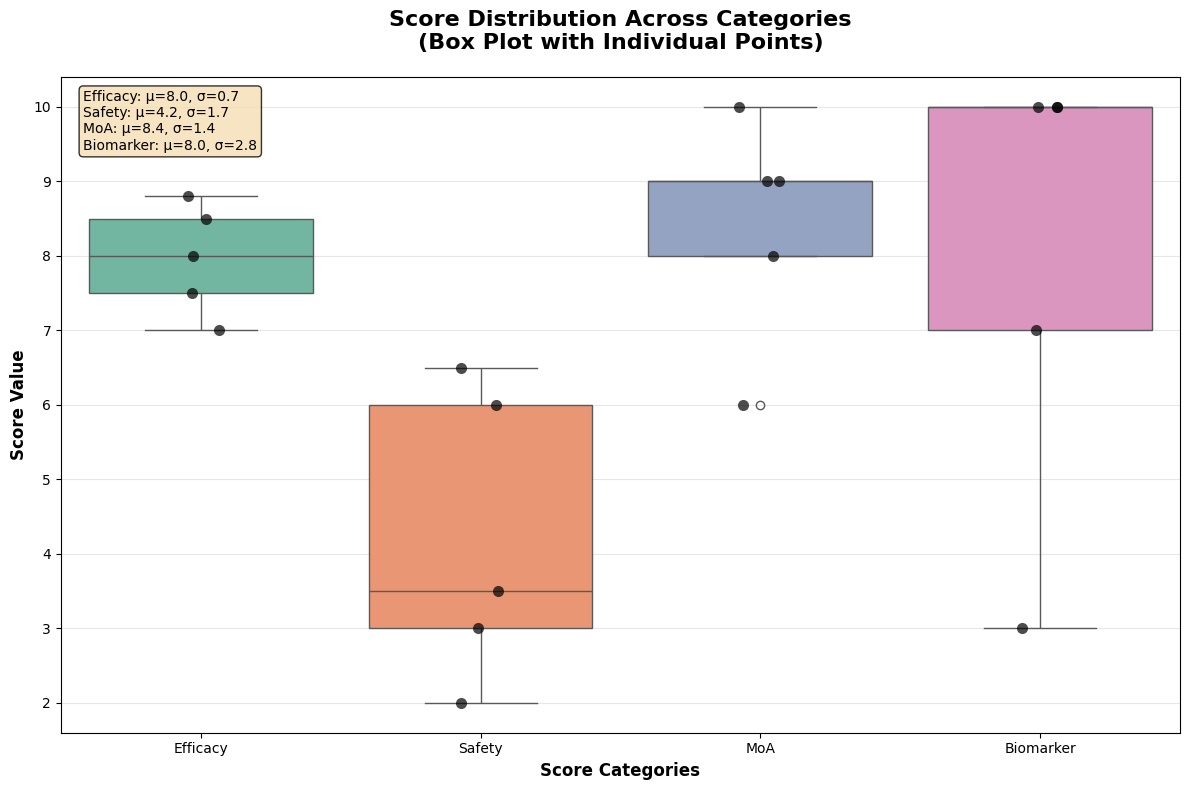

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data setup - restructure for box plot
data = {
    'Efficacy': [8.5, 8.0, 7.5, 7.0, 8.8],
    'Safety': [3.5, 6.0, 3.0, 2.0, 6.5],  # 10 - Toxicity
    'MoA': [9.0, 10.0, 9.0, 8.0, 6.0],
    'Biomarker': [3.0, 10.0, 10.0, 7.0, 10.0]
}

# Create long format data for box plot
plot_data = []
for category, scores in data.items():
    for score in scores:
        plot_data.append({'Category': category, 'Score': score})

df_long = pd.DataFrame(plot_data)

# Create box plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create box plot with individual points
box_plot = sns.boxplot(data=df_long, x='Category', y='Score',
                      palette='Set2', ax=ax)
strip_plot = sns.stripplot(data=df_long, x='Category', y='Score',
                          color='black', alpha=0.7, size=8, ax=ax)

# Customize plot
ax.set_title('Score Distribution Across Categories\n(Box Plot with Individual Points)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Score Categories', fontsize=12, fontweight='bold')
ax.set_ylabel('Score Value', fontsize=12, fontweight='bold')

# Add summary statistics as text
stats_text = []
for category, scores in data.items():
    mean_val = np.mean(scores)
    std_val = np.std(scores)
    stats_text.append(f'{category}: μ={mean_val:.1f}, σ={std_val:.1f}')

# Add statistics box
ax.text(0.02, 0.98, '\n'.join(stats_text), transform=ax.transAxes,
        verticalalignment='top', bbox=dict(boxstyle='round',
        facecolor='wheat', alpha=0.8), fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

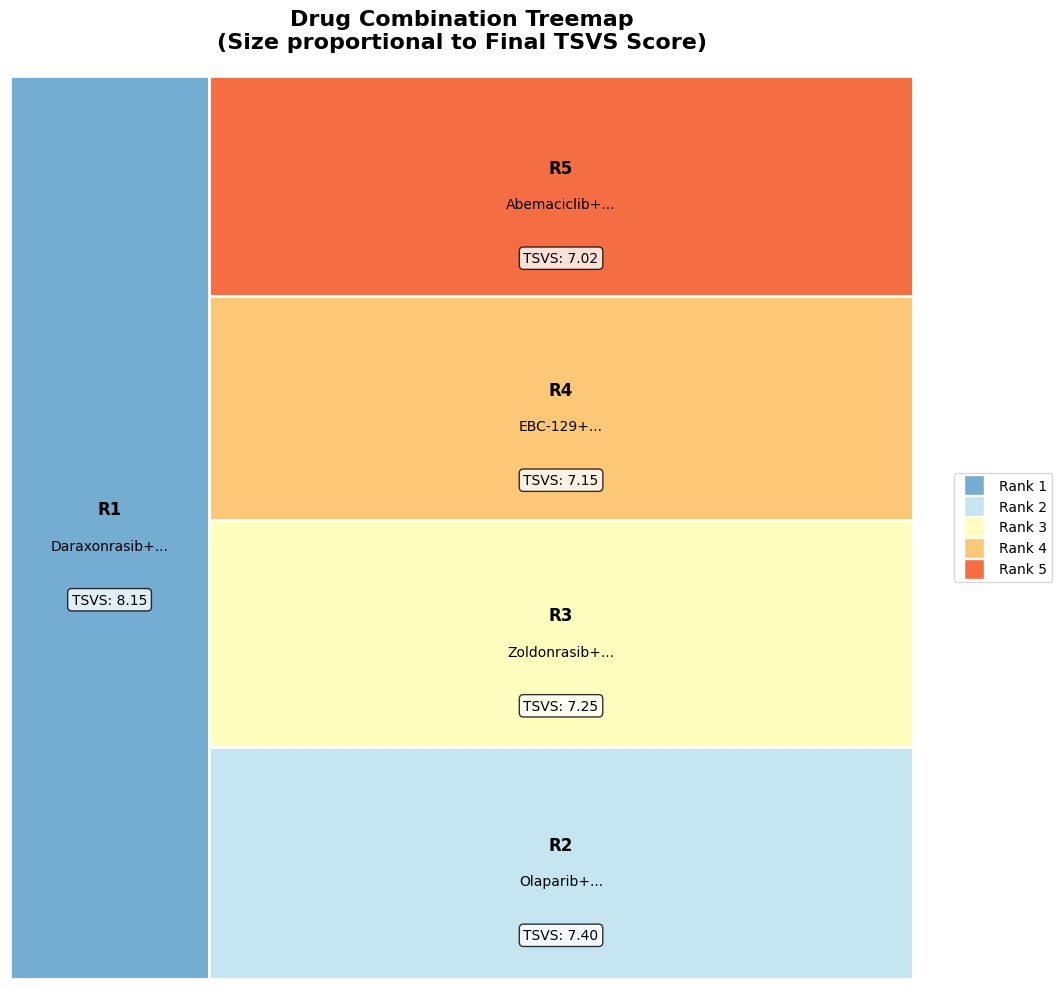

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as patches

# Data setup
data = {
    'Combination': [
        'Daraxonrasib + Mitazalimab + Nal-IRI',
        'Olaparib + Ceralasertib + Losartan',
        'Zoldonrasib + Motixafortide + SBRT',
        'EBC-129 + Atezolizumab + Mitazalimab',
        'Abemaciclib + Daraxonrasib + Olaparib'
    ],
    'Final_TSVS': [8.15, 7.40, 7.25, 7.15, 7.02],
    'Efficacy': [8.5, 8.0, 7.5, 7.0, 8.8]
}

df = pd.DataFrame(data)

# Simple treemap implementation
def create_treemap(sizes, labels, colors, ax):
    # Normalize sizes to fit in unit square
    total = sum(sizes)
    normalized_sizes = [s/total for s in sizes]

    # Simple algorithm to create rectangles
    rectangles = []
    x, y = 0, 0
    width, height = 1, 1

    # Sort by size (largest first)
    sorted_data = sorted(zip(normalized_sizes, labels, colors), reverse=True)

    remaining_width = width
    remaining_height = height

    for i, (size, label, color) in enumerate(sorted_data):
        if i == 0:
            # First rectangle takes up proportional width
            rect_width = size * width
            rect_height = height
            rect = patches.Rectangle((x, y), rect_width, rect_height,
                                   facecolor=color, edgecolor='white', linewidth=2)
            rectangles.append((rect, label, size))
            x += rect_width
            remaining_width -= rect_width
        elif i < len(sorted_data) - 1:
            # Subsequent rectangles
            rect_height = size * height / sum(s for s, _, _ in sorted_data[1:])
            rect_width = remaining_width
            rect = patches.Rectangle((x, y), rect_width, rect_height,
                                   facecolor=color, edgecolor='white', linewidth=2)
            rectangles.append((rect, label, size))
            y += rect_height
        else:
            # Last rectangle fills remaining space
            rect_width = remaining_width
            rect_height = remaining_height - y
            rect = patches.Rectangle((x, y), rect_width, rect_height,
                                   facecolor=color, edgecolor='white', linewidth=2)
            rectangles.append((rect, label, size))

    return rectangles

# Create treemap
fig, ax = plt.subplots(figsize=(14, 10))

# Use Final_TSVS scores as sizes and Efficacy for colors
sizes = df['Final_TSVS'].tolist()
labels = [f"R{i+1}: {name.split(' + ')[0]}+..." for i, name in enumerate(df['Combination'])]
colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(df)))

rectangles = create_treemap(sizes, labels, colors, ax)

# Add rectangles and labels to plot
for rect, label, size in rectangles:
    ax.add_patch(rect)

    # Add text label
    x = rect.get_x() + rect.get_width()/2
    y = rect.get_y() + rect.get_height()/2

    # Multi-line text for better fit
    lines = label.split(': ')
    if len(lines) > 1:
        ax.text(x, y + 0.02, lines[0], ha='center', va='center',
                fontweight='bold', fontsize=12)
        ax.text(x, y - 0.02, lines[1], ha='center', va='center',
                fontsize=10, wrap=True)
    else:
        ax.text(x, y, label, ha='center', va='center',
                fontweight='bold', fontsize=11)

    # Add score value
    original_score = df.loc[df['Combination'].str.contains(
        label.split(': ')[1].split('+')[0]), 'Final_TSVS'].iloc[0]
    ax.text(x, y - 0.08, f'TSVS: {original_score:.2f}',
            ha='center', va='center', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.title('Drug Combination Treemap\n(Size proportional to Final TSVS Score)',
          fontsize=16, fontweight='bold', pad=20)

# Add color legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='s', color='w',
                         markerfacecolor=colors[i], markersize=15,
                         label=f'Rank {i+1}') for i in range(len(df))]
ax.legend(handles=legend_elements, loc='center', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()